In [1]:
# standard library imports
import os, sys

# 3rd party libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt

# local library imports
sys.path.append('/home/dharshan/Code/Work/UCSF-qMRI/qmri-toolbox')
from pyqmri.img_utils import view_utils
from pyqmri.phantom_util import material_phantoms as mp_util


In [2]:
# read TE list
ute_list = []
with open('multi_utes.dat', 'r') as utes_file:
    ute_info = utes_file.readlines()
    multi_utes_fname = ute_info.pop(0)
    num_utes = int(ute_info.pop(0).split()[-1])
    
    for ii in range(num_utes):
        ute_list.append(float(ute_info[ii]))
        
print(ute_list)

[24.0, 40.0, 60.0, 80.0, 120.0, 160.0, 200.0, 280.0, 360.0, 440.0, 600.0, 800.0, 1000.0, 1200.0, 1400.0, 1600.0, 1800.0, 2000.0, 2200.0, 2400.0, 2600.0, 2800.0, 3000.0, 3200.0, 3400.0, 3600.0, 3800.0, 4000.0, 4200.0, 4400.0, 4600.0, 5000.0]


In [3]:
# read reconstructed image data
with h5py.File('data/recon_multi-ute.mat','r') as recon_mat:
    recon_ims_all_echoes = recon_mat['imall'].value

In [4]:
# Get voxel dimensions

# !!!--KLUDGE (temporary)--!!!
dx = 2
dy = 2
dz = 2

(nz, ny, nx) = recon_ims_all_echoes.shape[-3:]

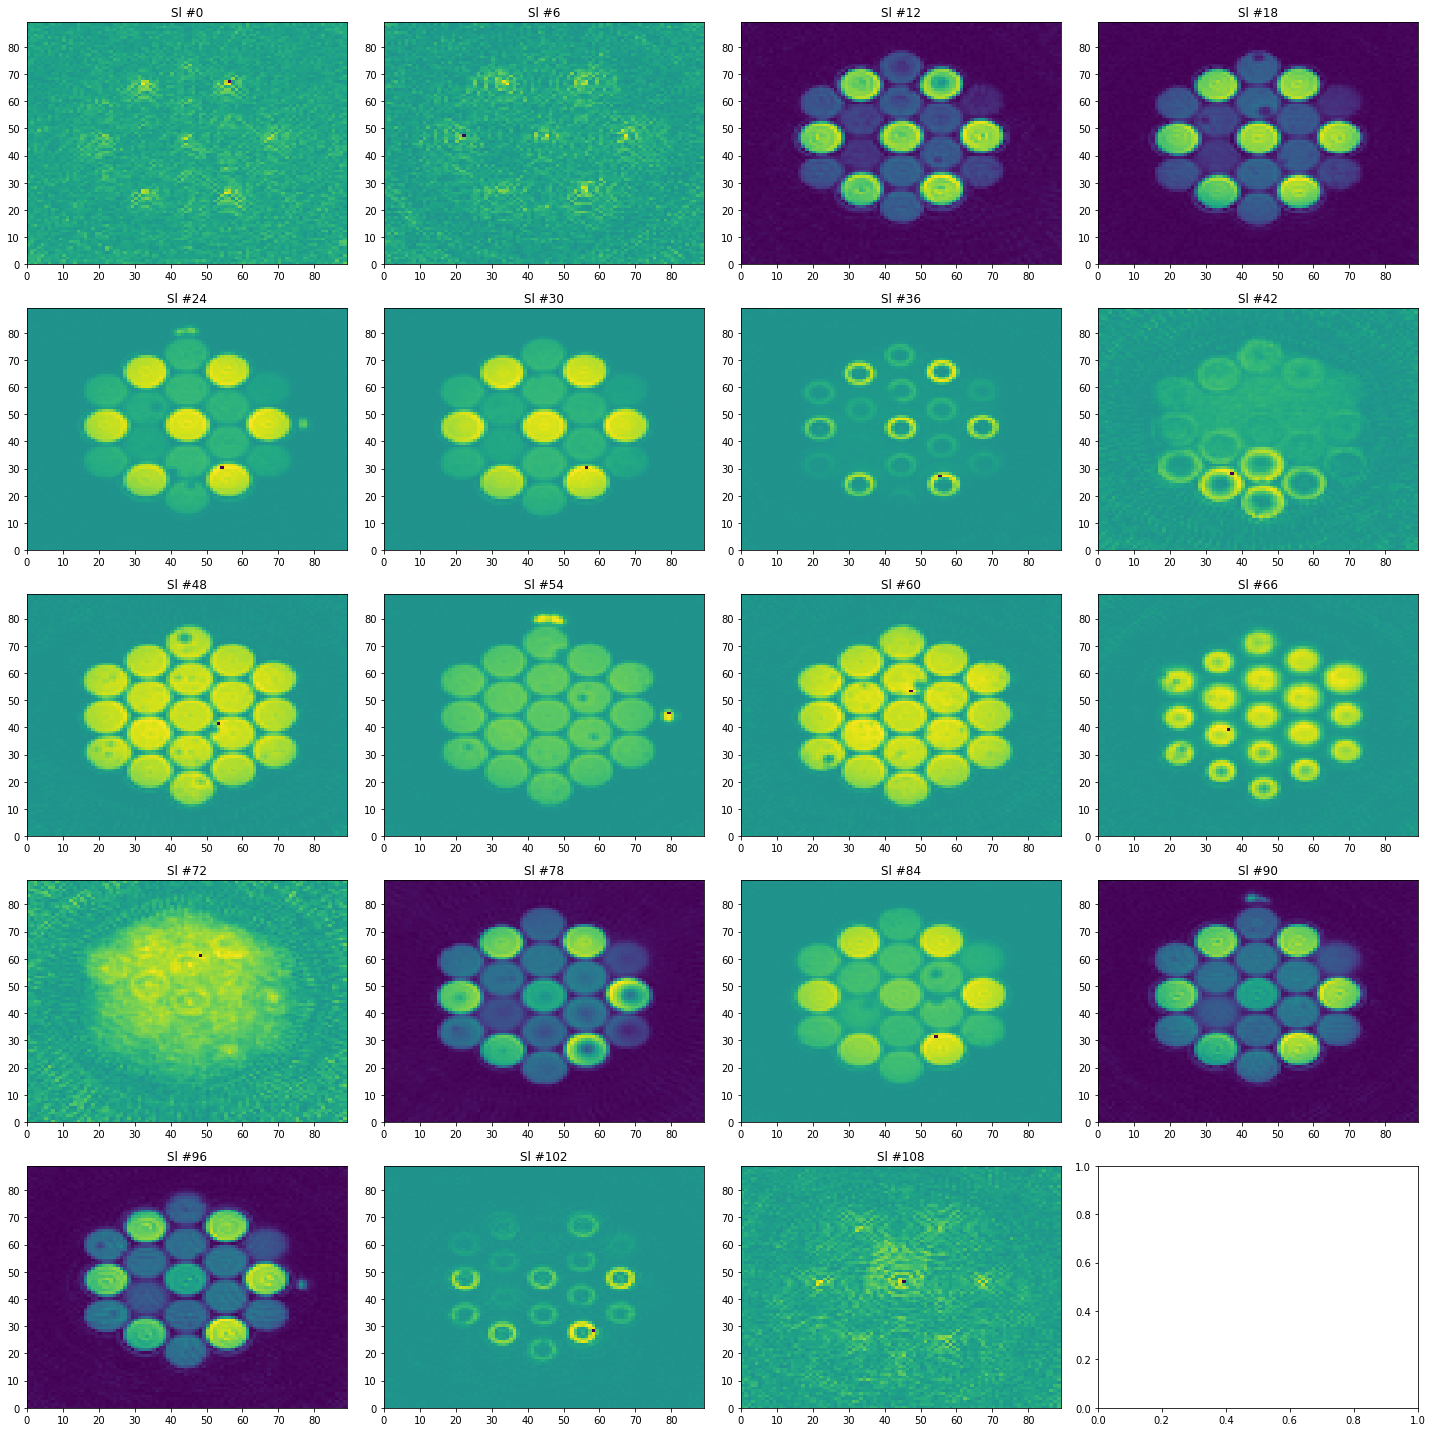

In [5]:
# Plot a few slices
plt.close()
view_utils.preview_volume_cplx(recon_ims_all_echoes[0,0,::])
plt.show()

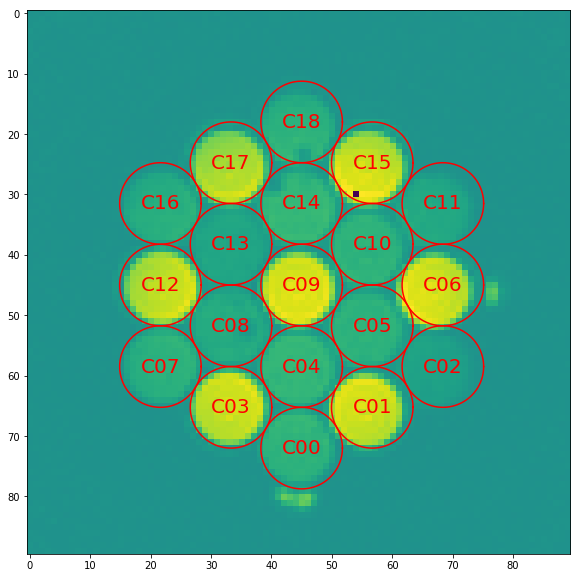

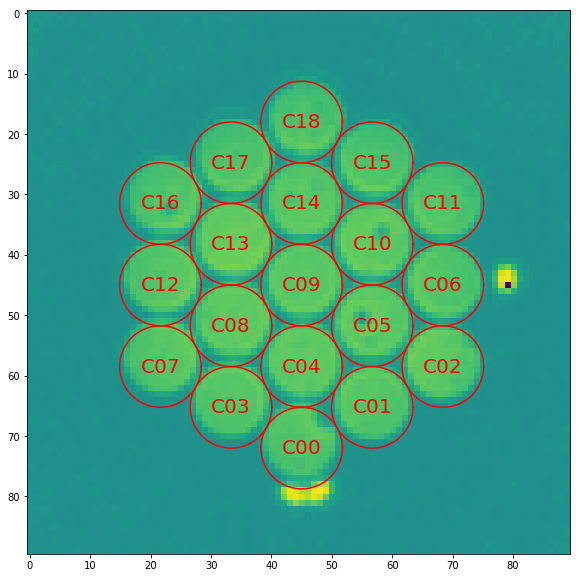

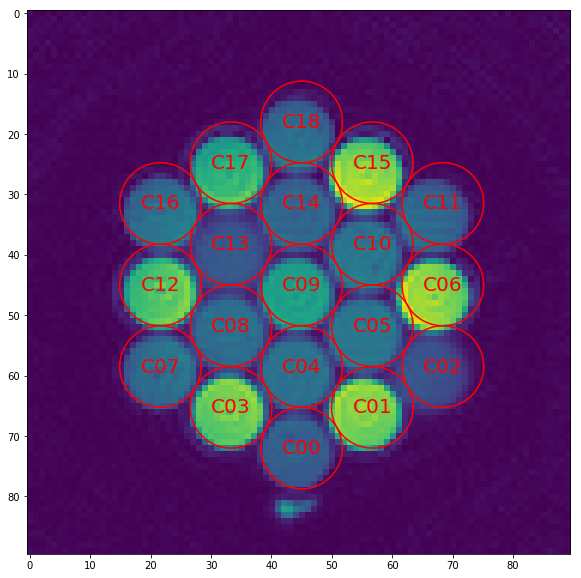

In [6]:
# pGd preview
plt.close()

pGd_sli = 24
row, col, pGd_scl_slice = view_utils.norm_mag_slice(recon_ims_all_echoes[0,0,::], 
                                                    pGd_sli, 2)

pGd_labels = [
    '(B01.2) Undoped Plaster',
    '(W14) Water + 0.16% wt. Gd',
    '(B14.2) Plaster + 1.6% wt. Gd',
    '(W13) Water + 0.08% wt. Gd',
    '(B12.1) Plaster + 0.4% wt. Gd',
    '(B11.1) Plaster + 0.2% wt. Gd',
    '(W15) Water + 0.32% wt. Gd',
    '(B10.2) Plaster + 0.1% wt. Gd',
    '(B13.1) Plaster + 0.8% wt. Gd',
    '(W10) Water + 0.01% wt. Gd',
    '(B10.1) Plaster + 0.1% wt. Gd',
    '(B13.2) Plaster + 0.8% wt. Gd',
    '(W12) Water + 0.04% wt. Gd',
    '(B14.1) Plaster + 1.6% wt. Gd',
    '(B01.1) Undoped Plaster',
    '(W16) Water + 0.64% wt. Gd',
    '(B11.2) Plaster + 0.2% wt. Gd',
    '(W11) Water + 0.02% wt. Gd',
    '(B12.2) Plaster + 0.4% wt. Gd'
]

rpGd = mp_util.MaterialsPhantom_Mk5('MP-Mk5-rpGd',
                                    container_labels=pGd_labels)
rpGd.preview_geometry_2d(pGd_scl_slice, dx, dy, 
                         dcy0=0.0,
                         dth=0.0)

pIoh_sli = 54
row, col, pIoh_scl_slice = view_utils.norm_mag_slice(recon_ims_all_echoes[0,0,::], 
                                                     pIoh_sli, 2)

pIoh_labels = [
    '(Pi4.000B) Plaster + 4.0% wt. Iohexol',
    '(Wi0.250) Water + 0.25% wt. Iohexol',
    '(Pi2.000B) Plaster + 2.0% wt. Iohexol',
    '(Wi0.125) Water + 0.125% wt. Iohexol',
    '(Pi0.500A) Plaster + 0.5% wt. Iohexol',
    '(Pi0.250A) Plaster + 0.25% wt. Iohexol',
    '(Wi0.500) Water + 0.5% wt. Iohexol',
    '(B01B) Undoped Plaster',
    '(Pi1.000A) Plaster + 1.0% wt. Iohexol',
    '(W01) Undoped Water',
    '(B01A) Undoped Plaster',
    '(Pi1.000B) Plaster + 1.0% wt. Iohexol',
    '(Wi4.000) Water + 4.0% wt. Iohexol',
    '(Pi2.000A) Plaster + 2.0% wt. Iohexol',
    '(Pi4.000A) Plaster + 4.0% wt. Iohexol',
    '(Wi1.000) Water + 1.0% wt. Iohexol',
    '(Pi0.250B) Plaster + 0.25% wt. Iohexol',
    '(Wi2.000) Water + 2.0% wt. Iohexol',
    '(Pi0.500B) Plaster + 0.5% wt. Iohexol'
]

rpIoh = mp_util.MaterialsPhantom_Mk5('MP-Mk5-rpIoh',
                                     container_labels=pIoh_labels)
rpIoh.preview_geometry_2d(pIoh_scl_slice, dx, dy, 
                          dcy0=0.0,
                          dth=0.0)

# pCu preview
pCu_sli = 90
row, col, pCu_scl_slice = view_utils.norm_mag_slice(recon_ims_all_echoes[0,0,::], 
                                                    pCu_sli, 2)

pCu_labels = [
    '(B01.2) Undoped Plaster',
    '(W07) Water + 0.8% wt. CuSO4',
    '(B08.2) Plaster + 4.0% wt. CuSO4',
    '(W06) Water + 0.4% wt. CuSO4',
    '(B06.1) Plaster + 0.25% wt. CuSO4',
    '(B04.1) Plaster + 1.0% wt. CuSO4',
    '(W08) Water + 1.6% wt. CuSO4',
    '(B02.2) Plaster + 0.5% wt. CuSO4',
    '(B07.1) Plaster + 2.0% wt. CuSO4',
    '(W02) Water + 0.5% wt. CuSO4',
    '(B02.1) Plaster + 0.5% wt. CuSO4',
    '(B07.2) Plaster + 2.0% wt. CuSO4',
    '(W05) Water + 0.2% wt. CuSO4',
    '(B08.1) Plaster + 4.0% wt. CuSO4',
    '(B01.1) Undoped Plaster',
    '(W09) Water + 3.2% wt. CuSO4',
    '(B04.2) Plaster + 1.0% wt. CuSO4',
    '(W04) Water + 0.1% wt. CuSO4',
    '(B06.2) Plaster + 0.25% wt. CuSO4',
]

rpCu = mp_util.MaterialsPhantom_Mk5('MP-Mk5-rpCu',
                                    container_labels=pCu_labels)
rpCu.preview_geometry_2d(pCu_scl_slice, dx, dy, 
                         dcx0=0.0,
                         dcy0=0.0,
                         dth=0.0)

plt.show()

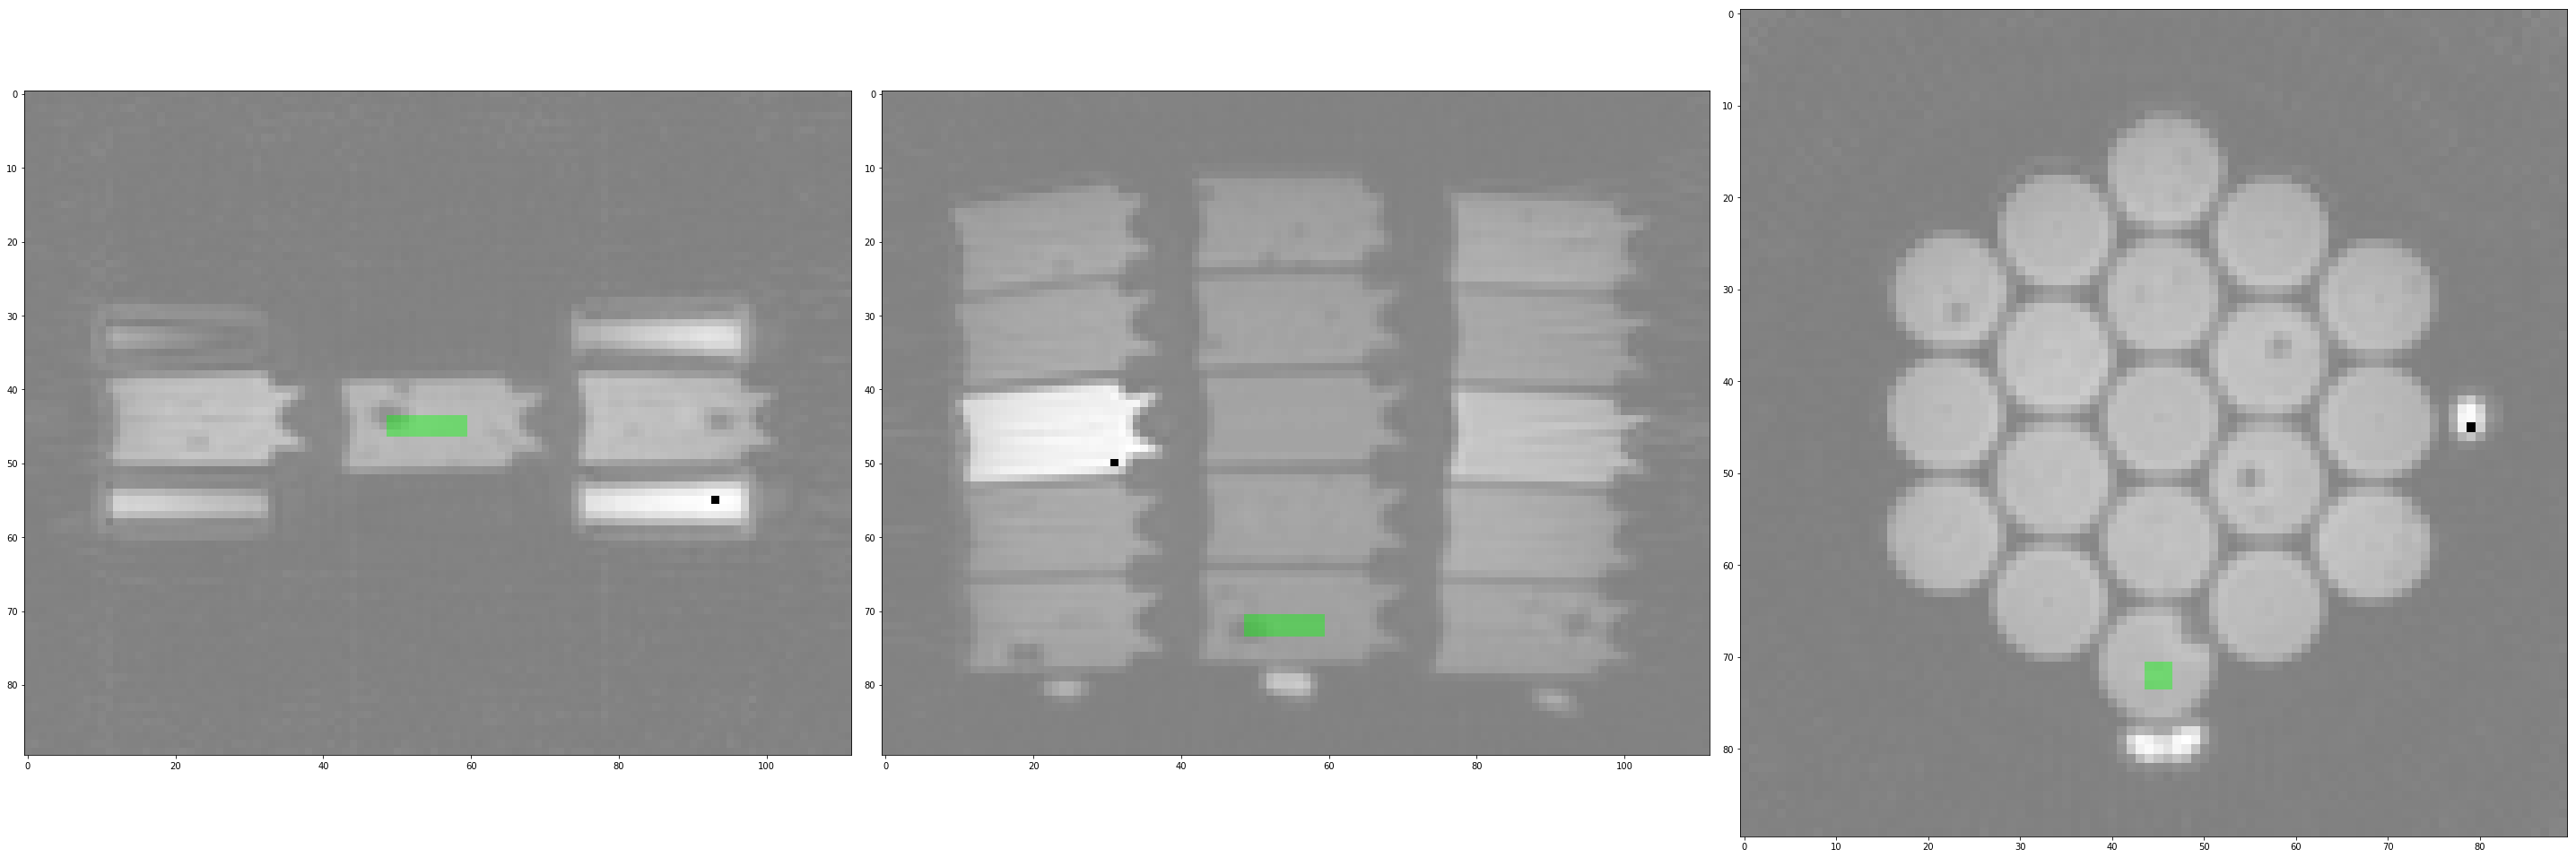

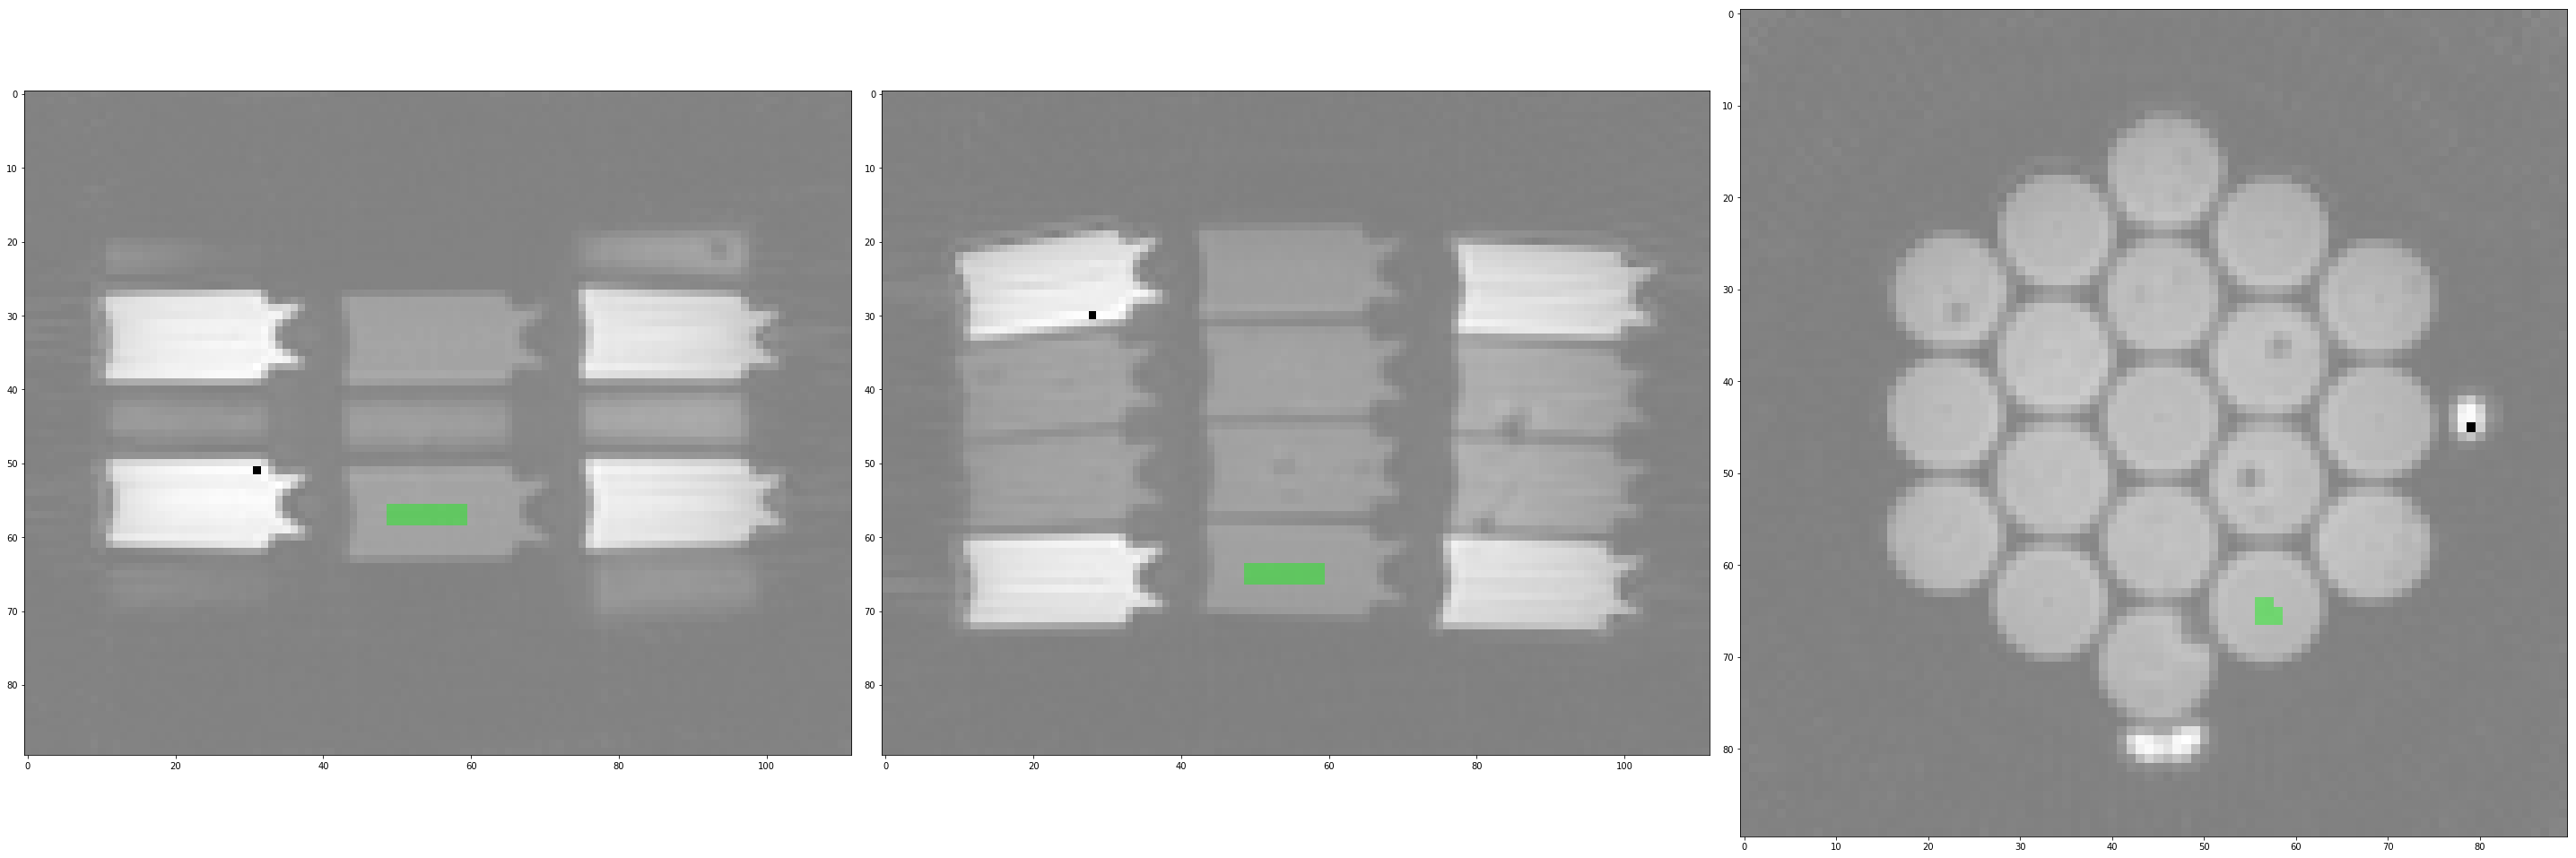

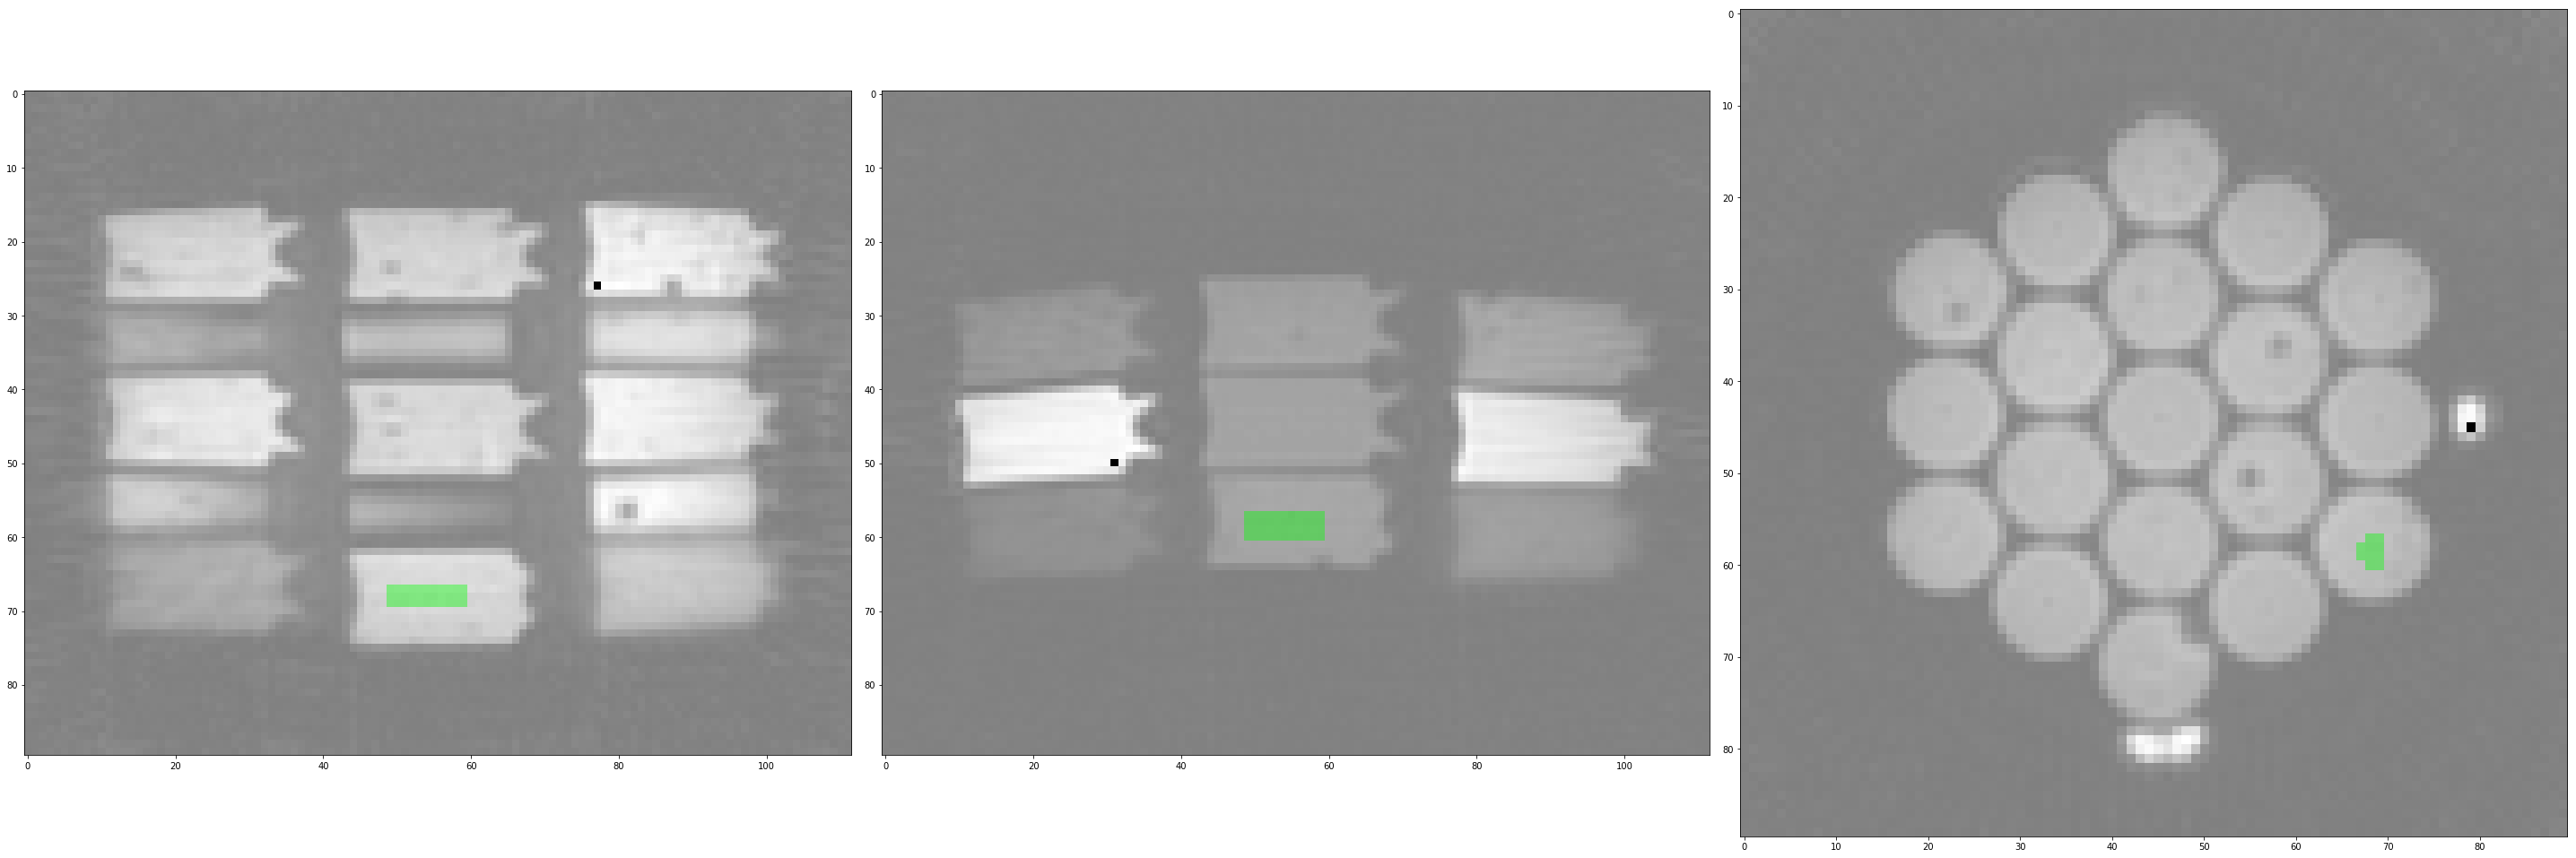

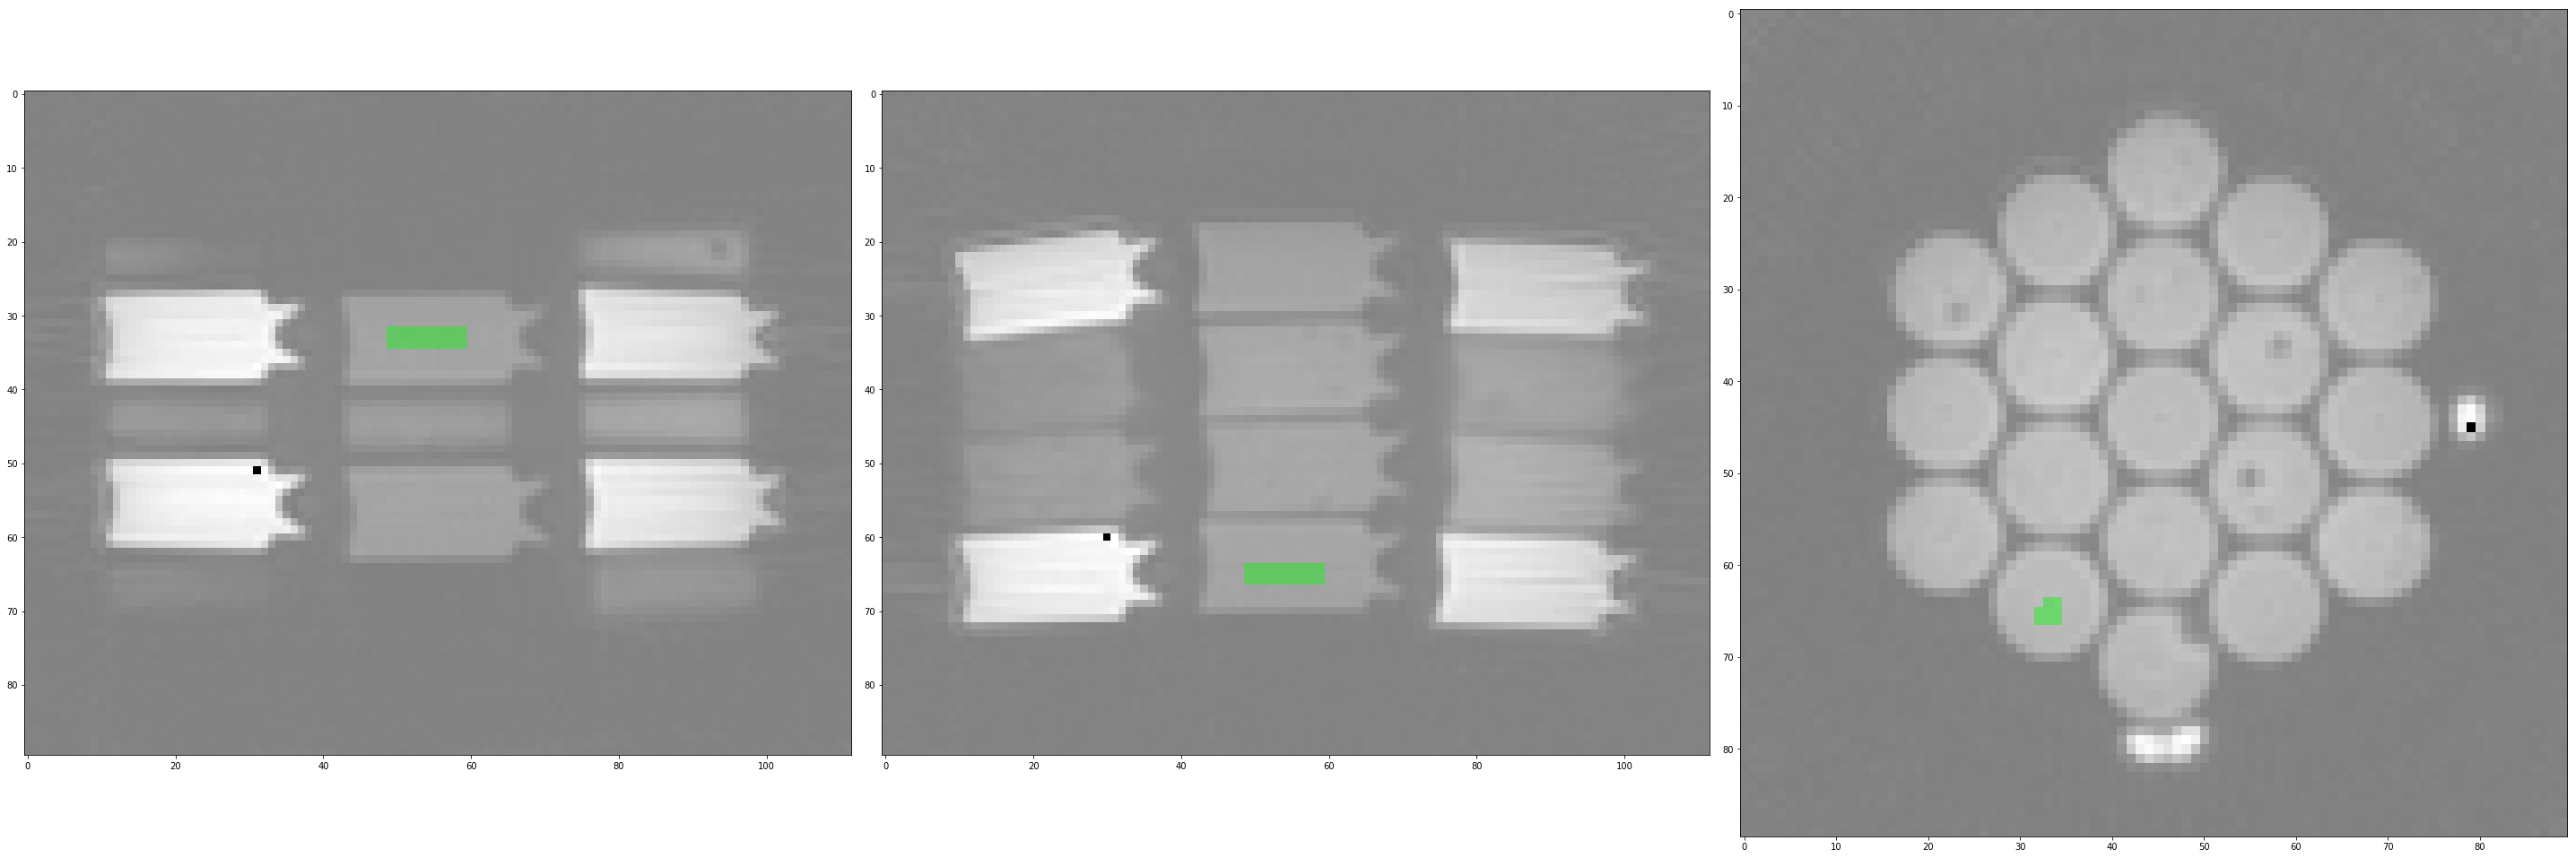

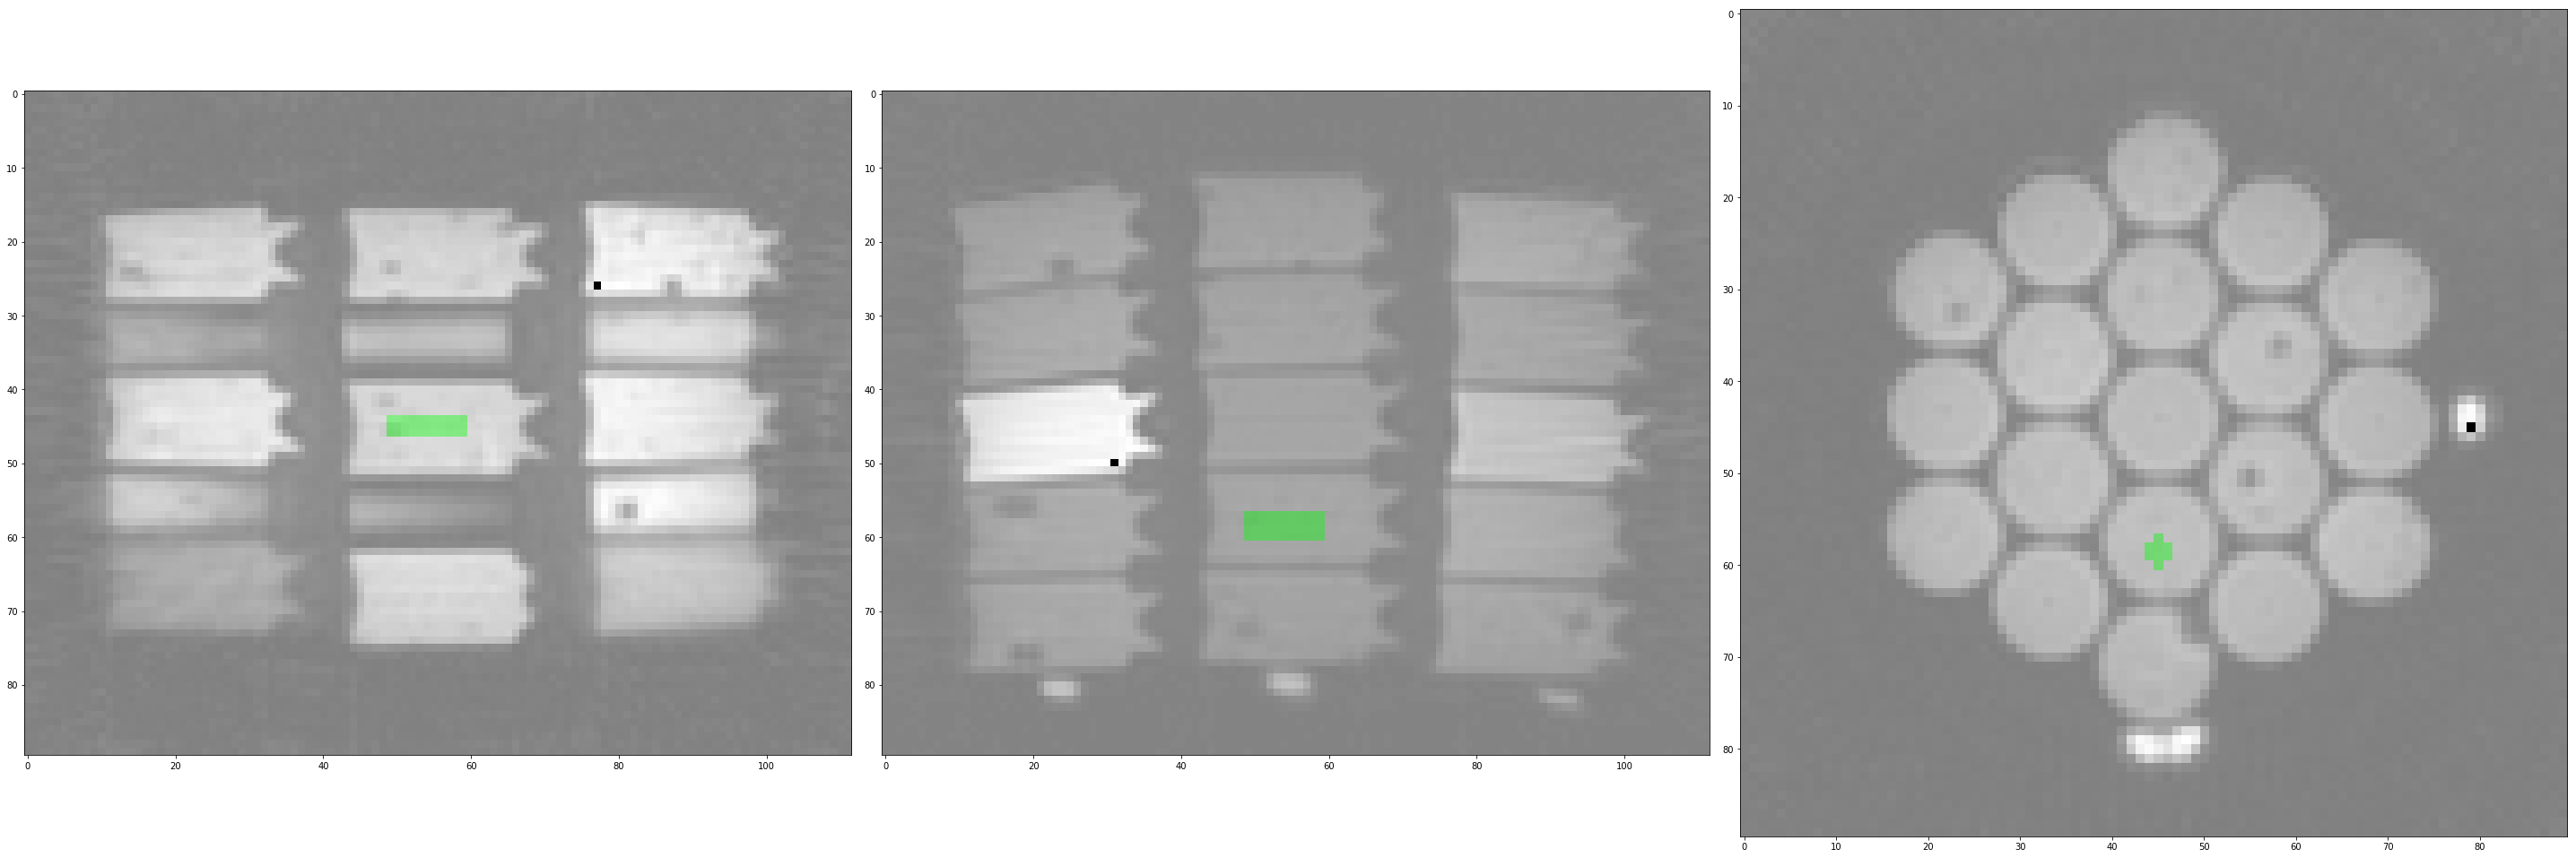

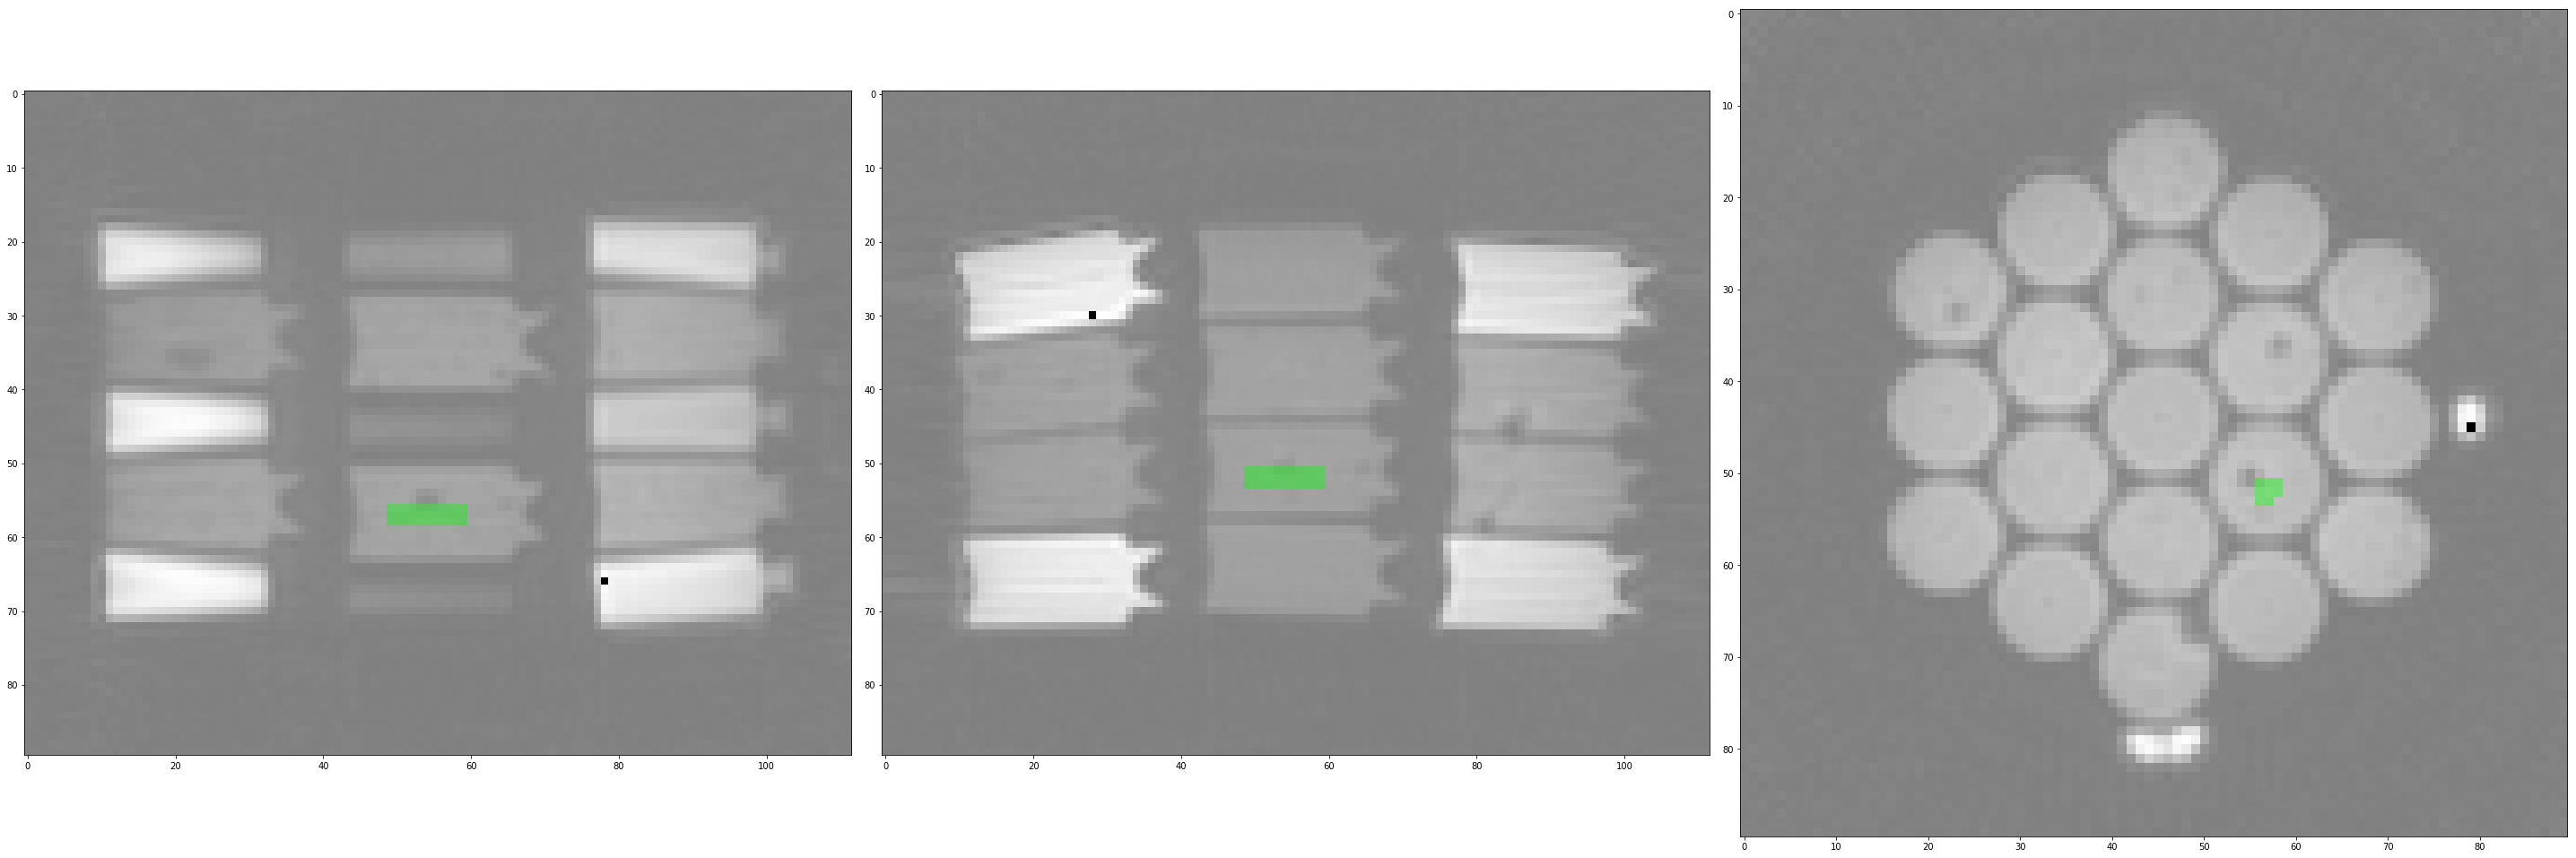

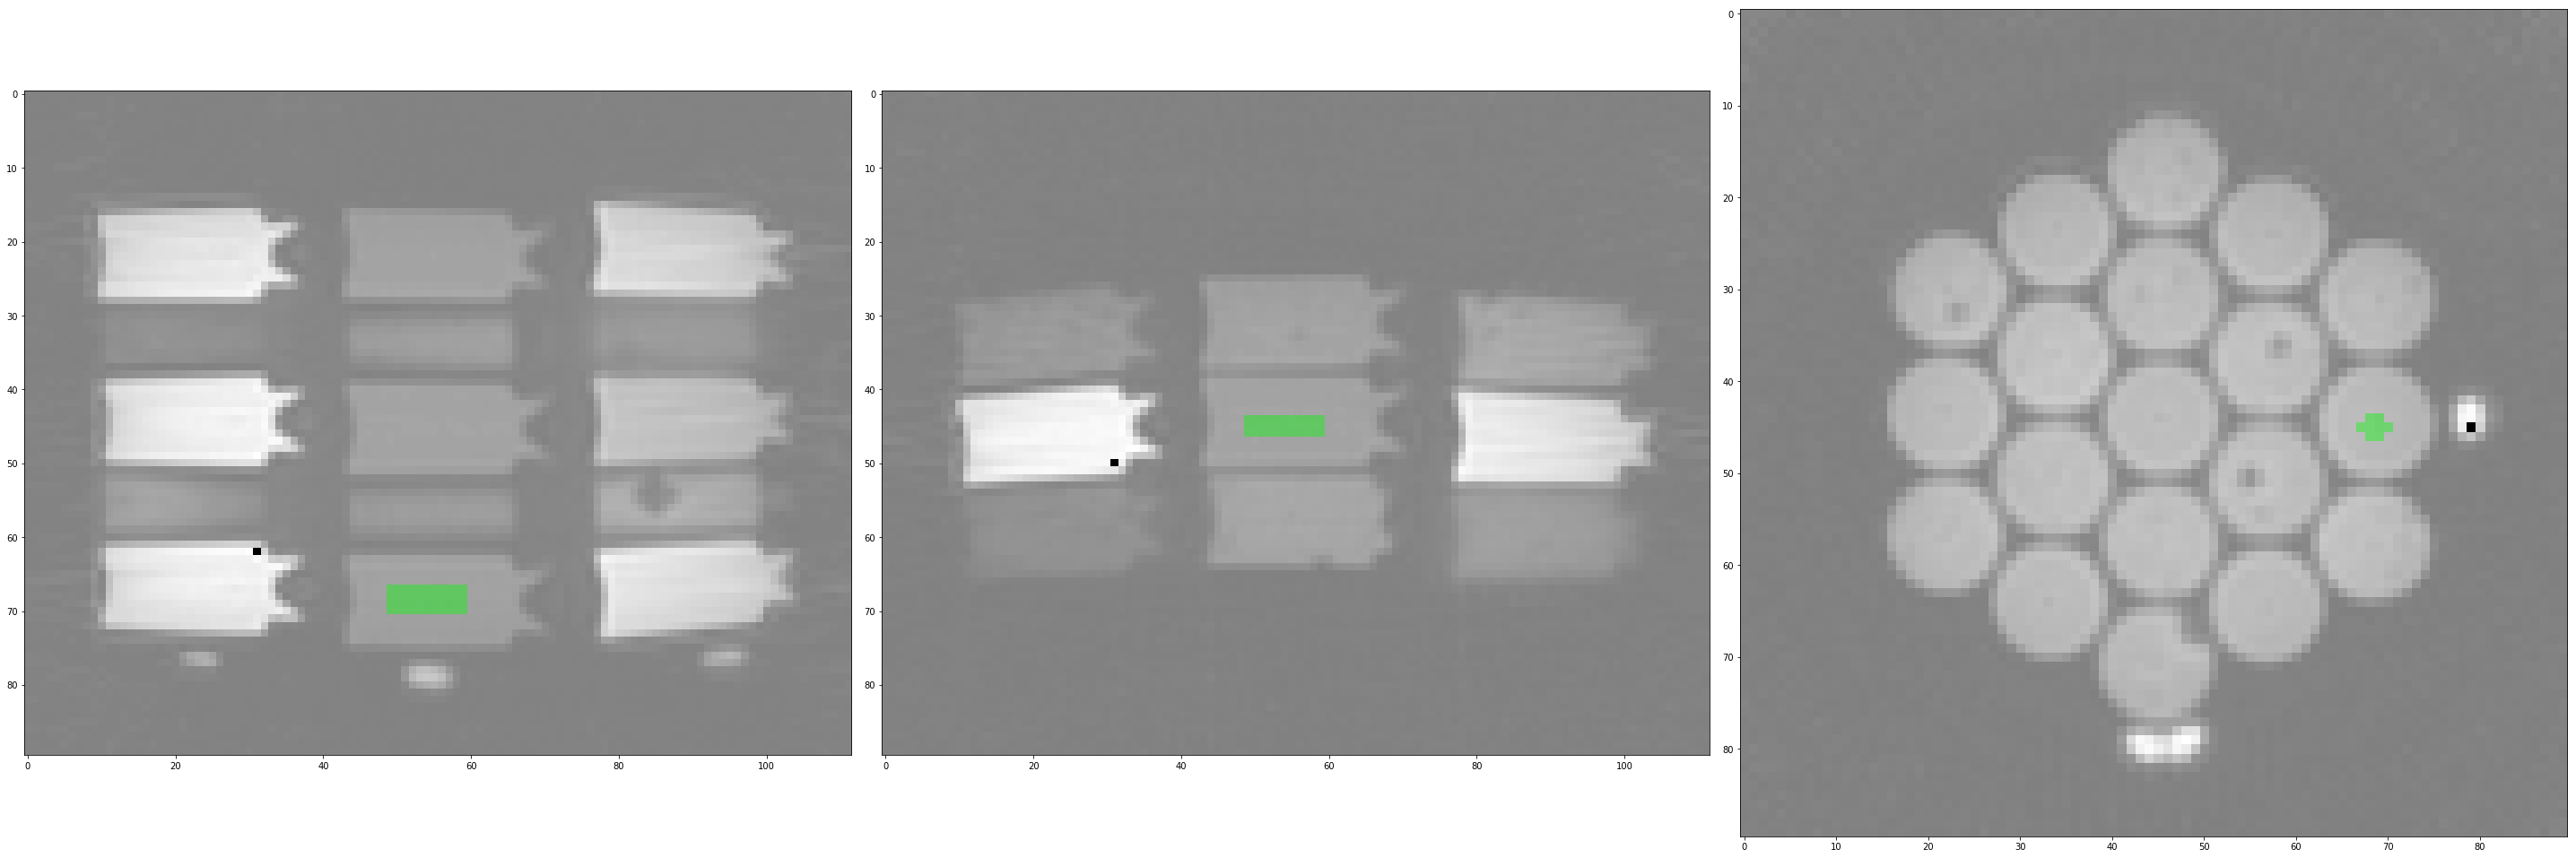

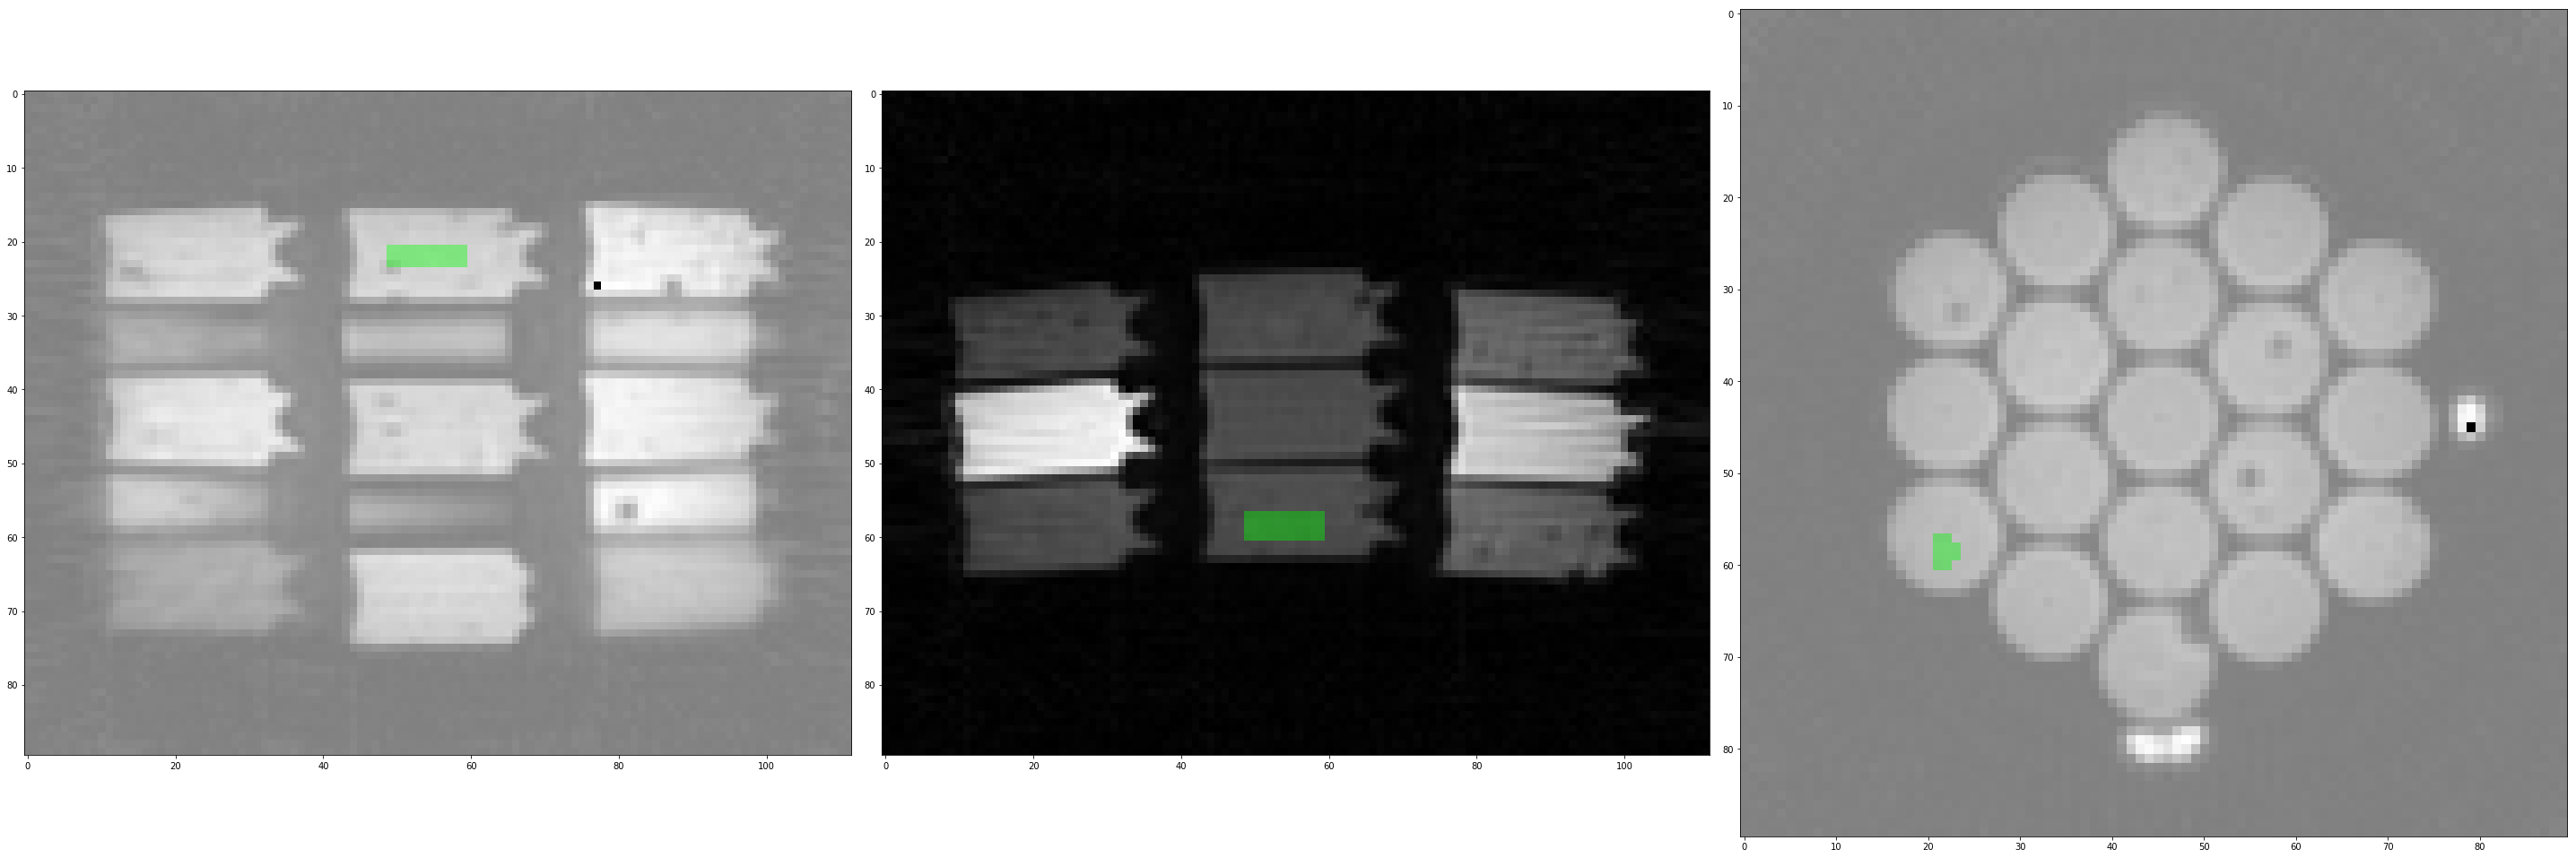

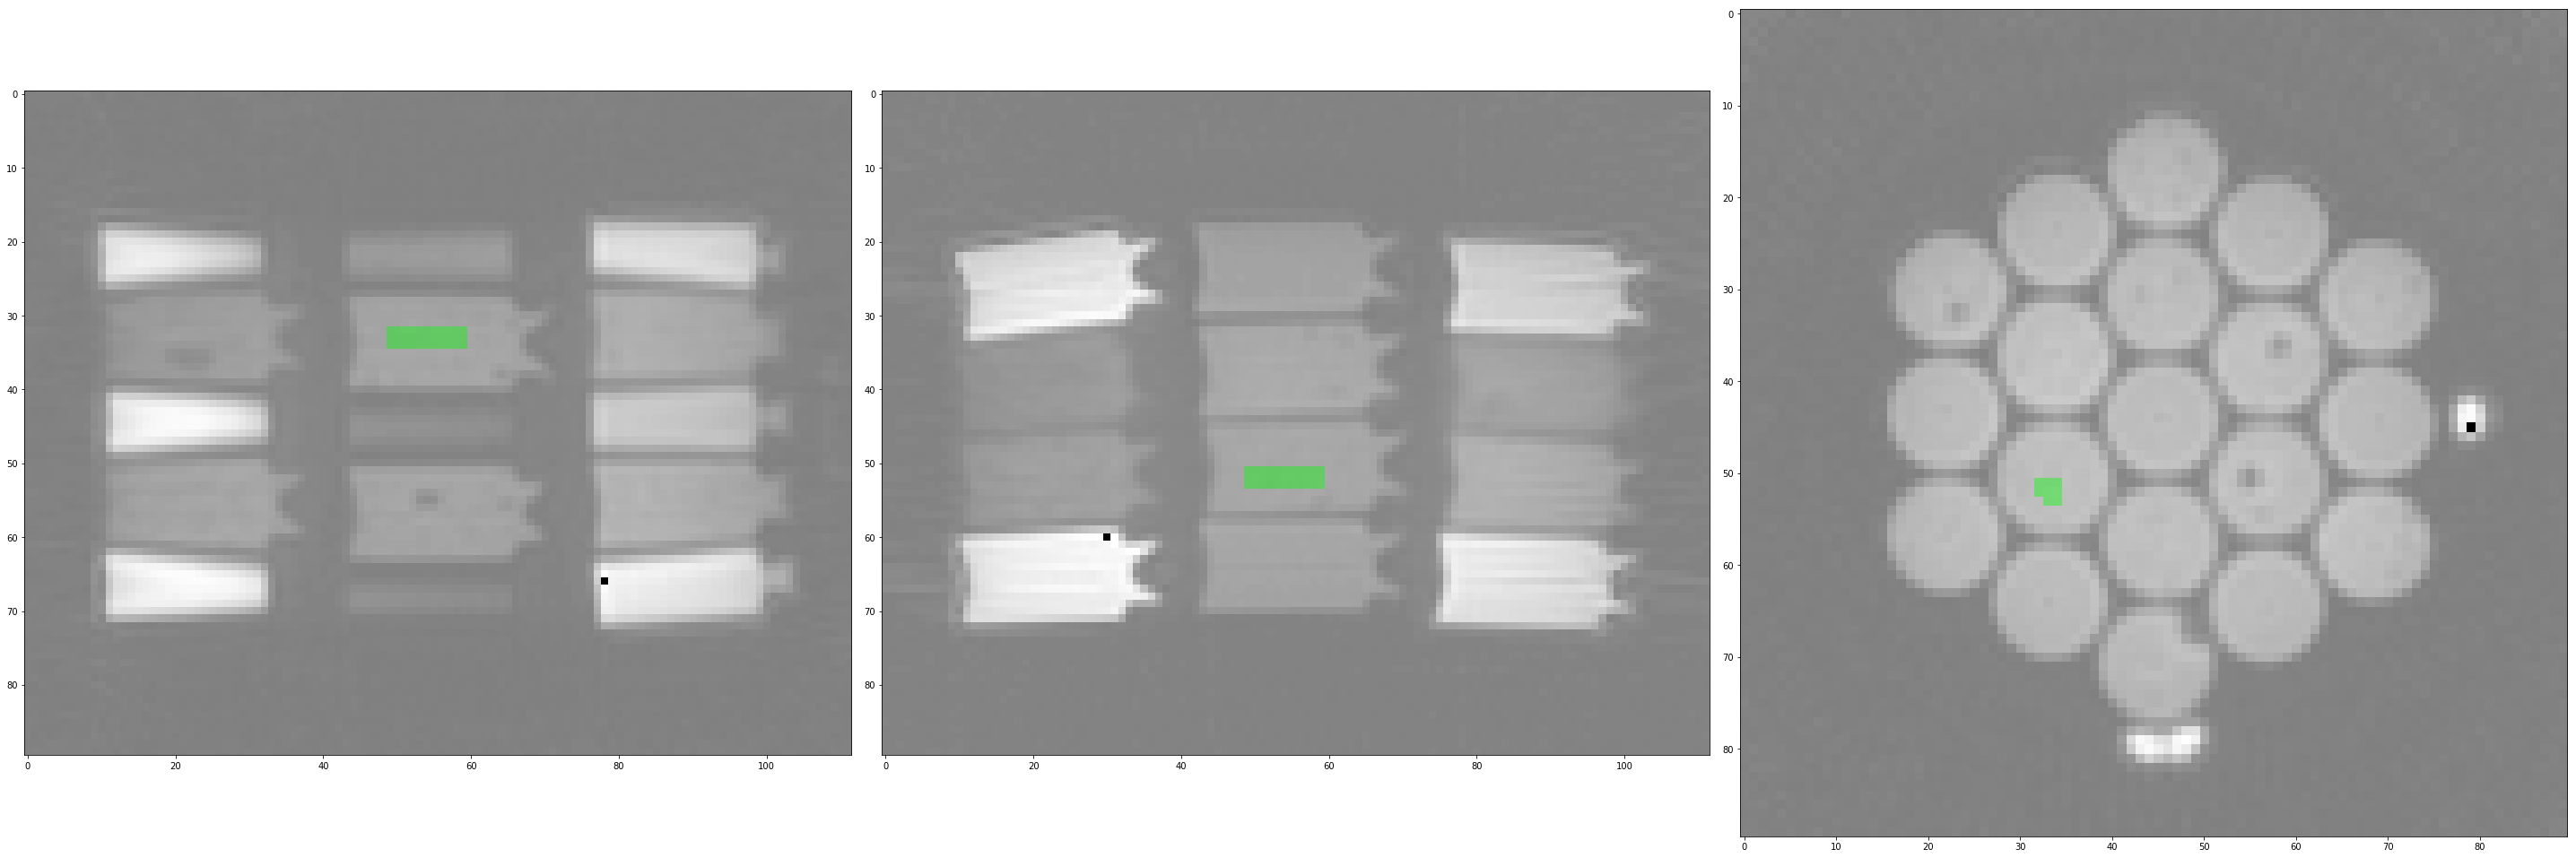

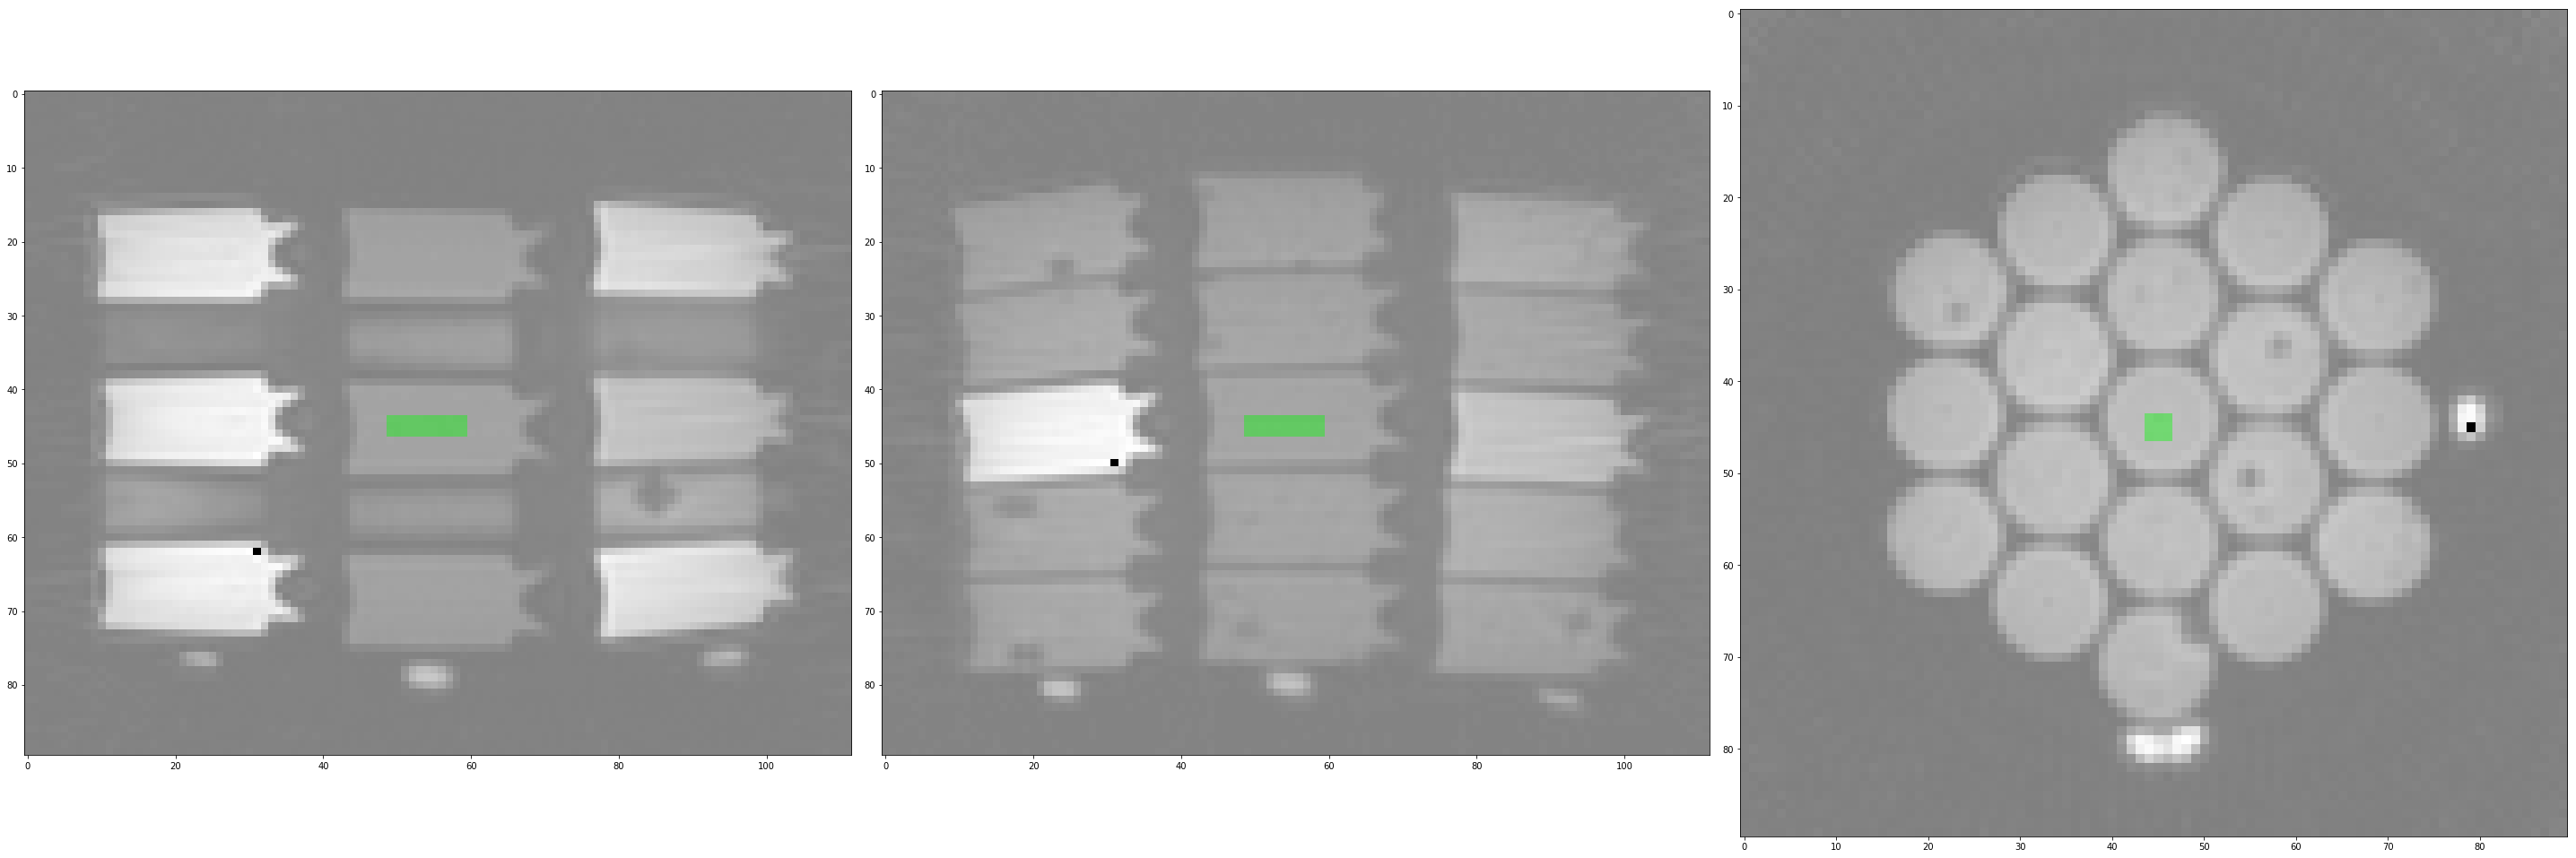

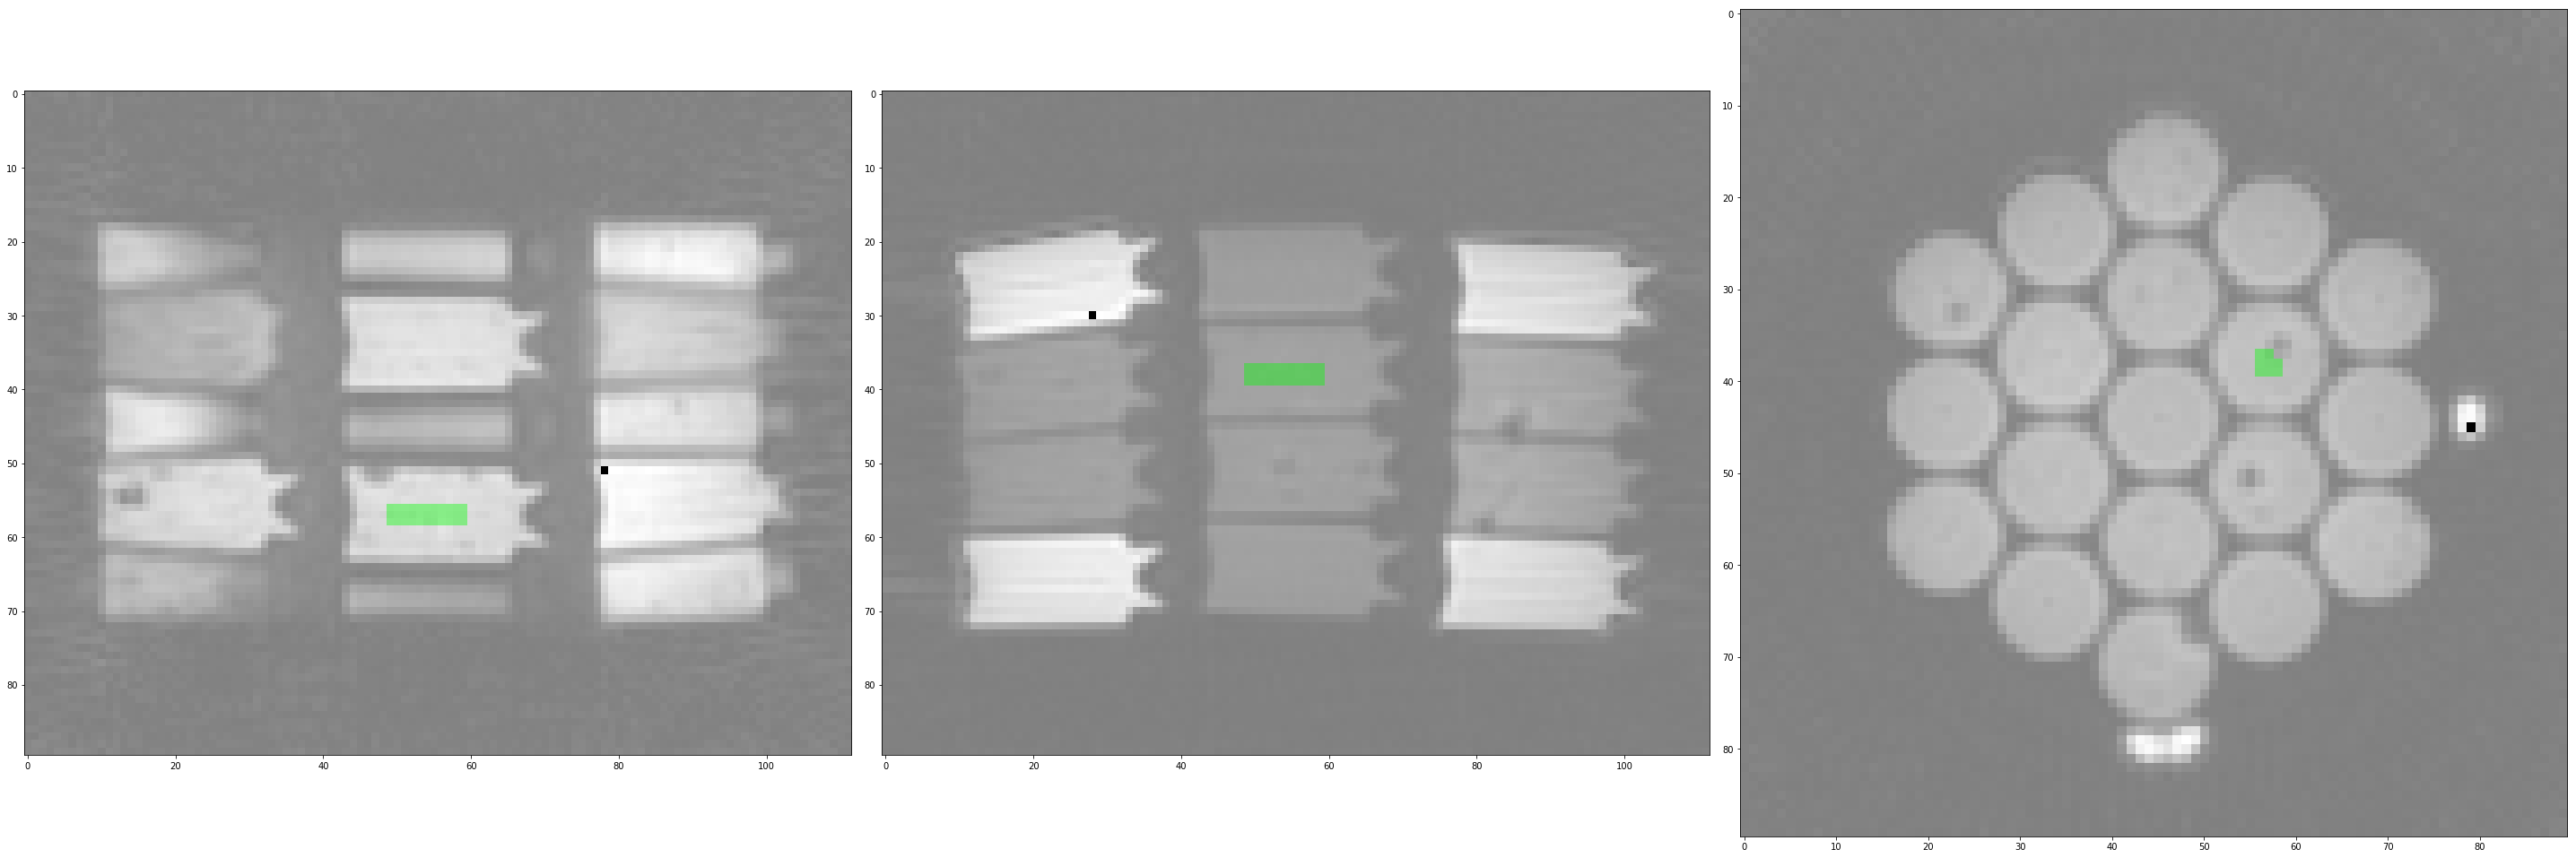

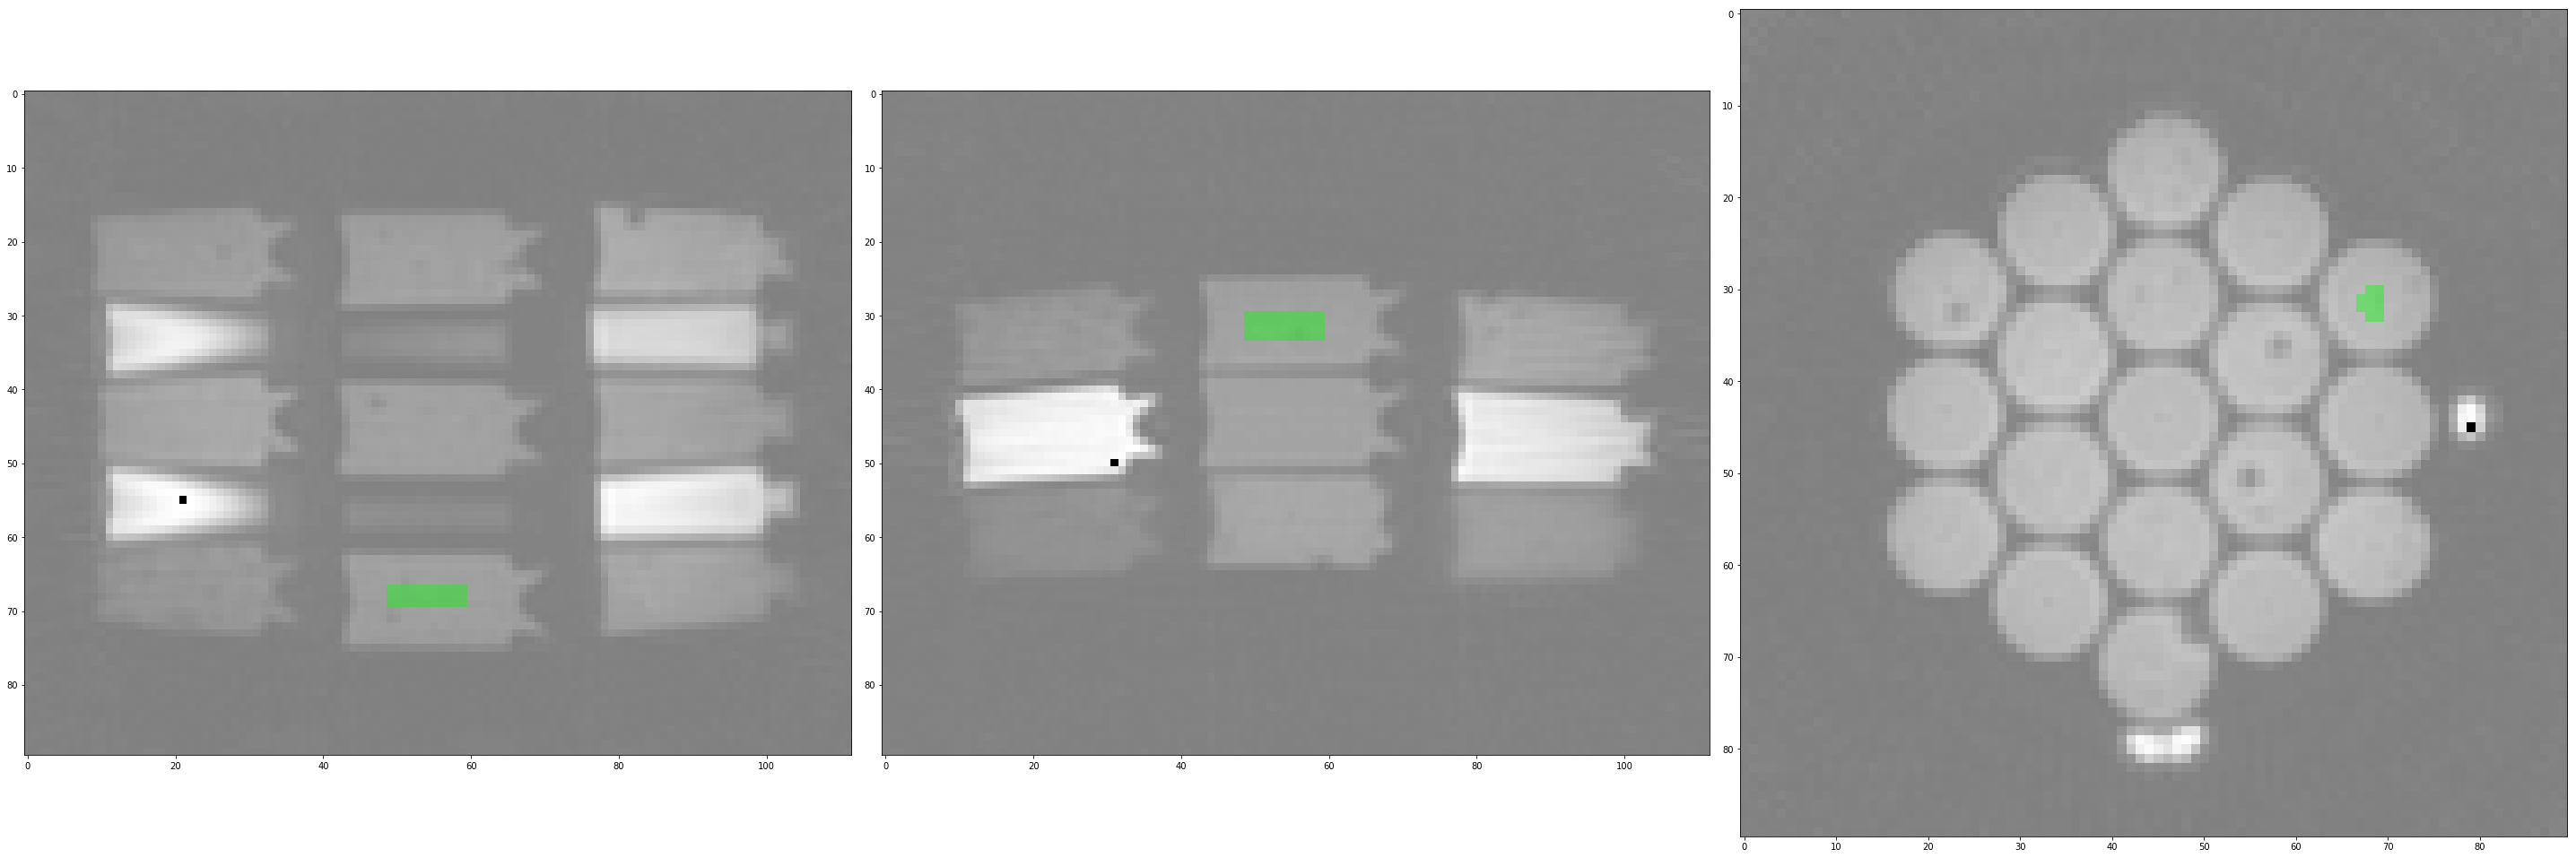

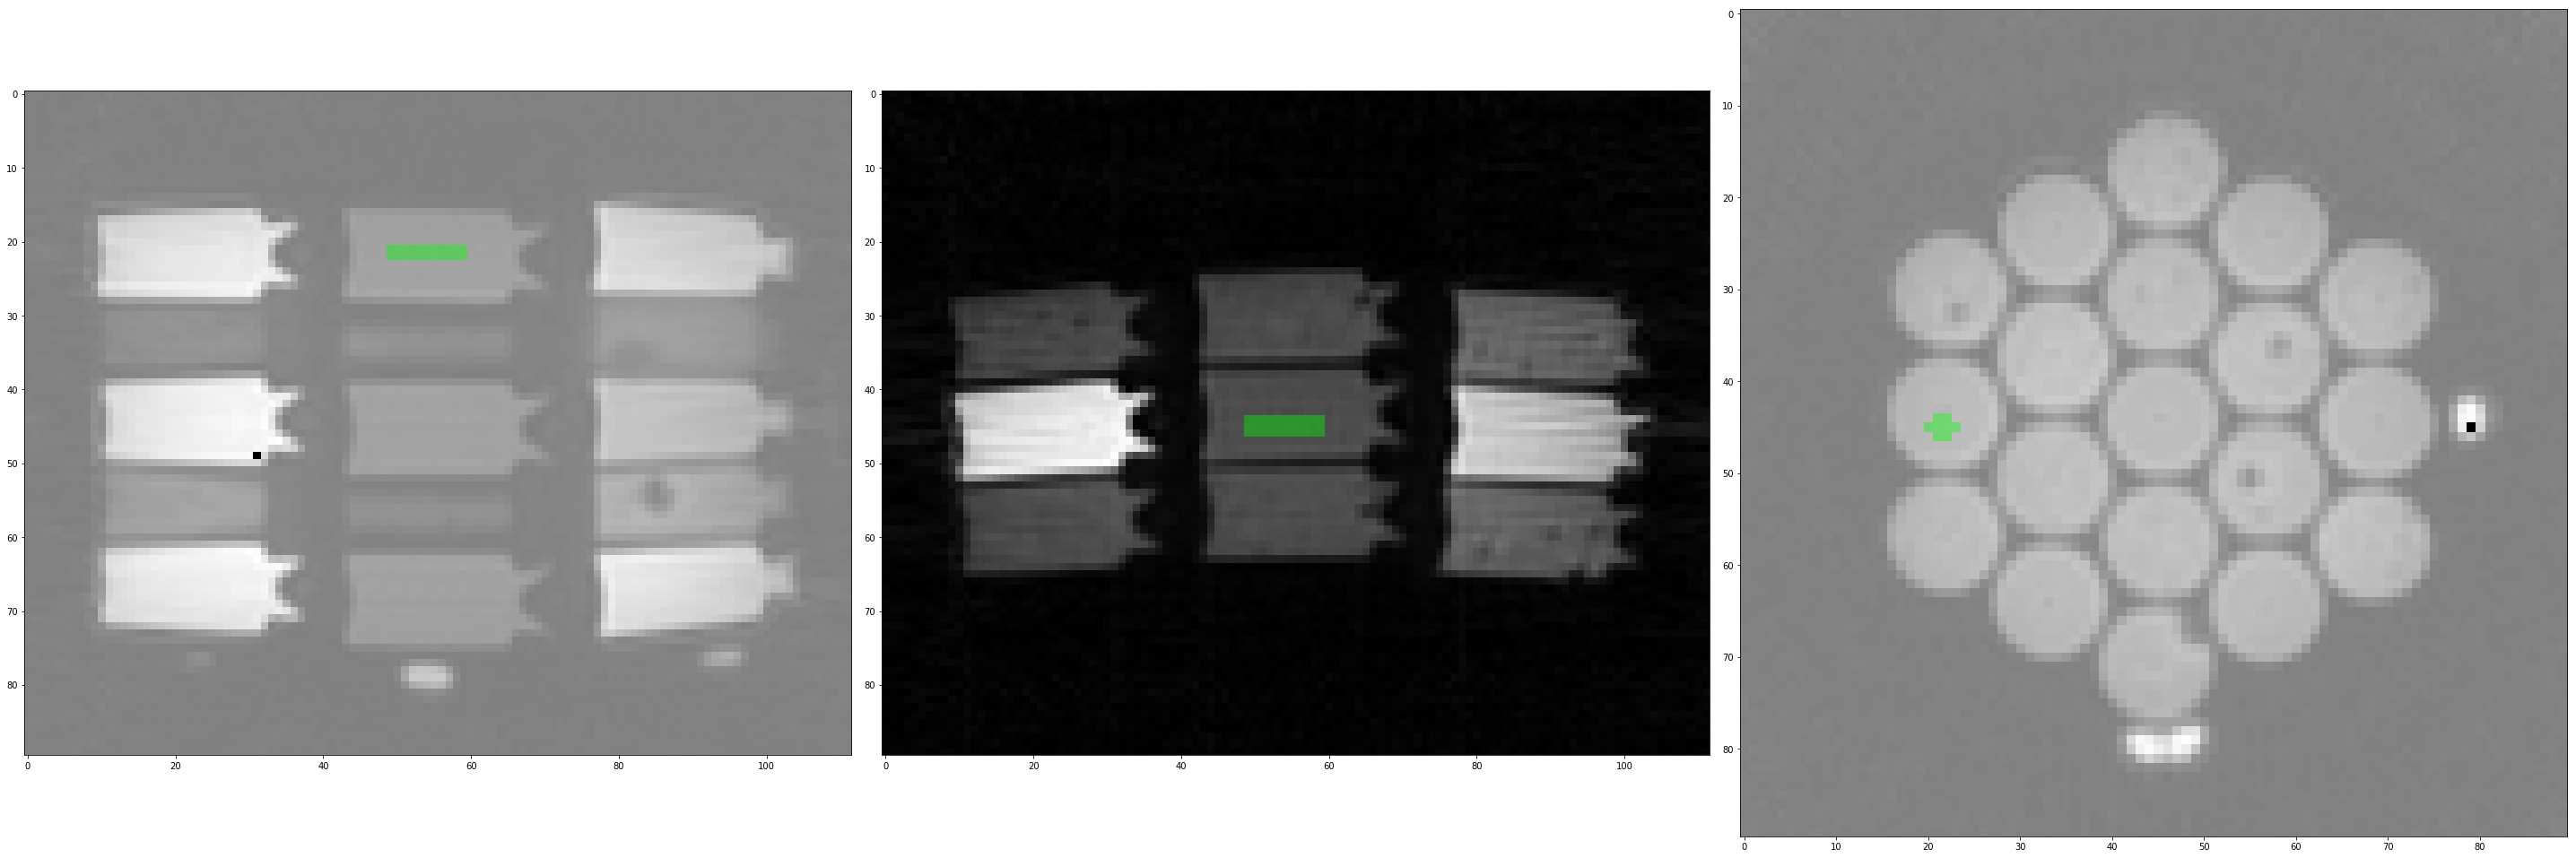

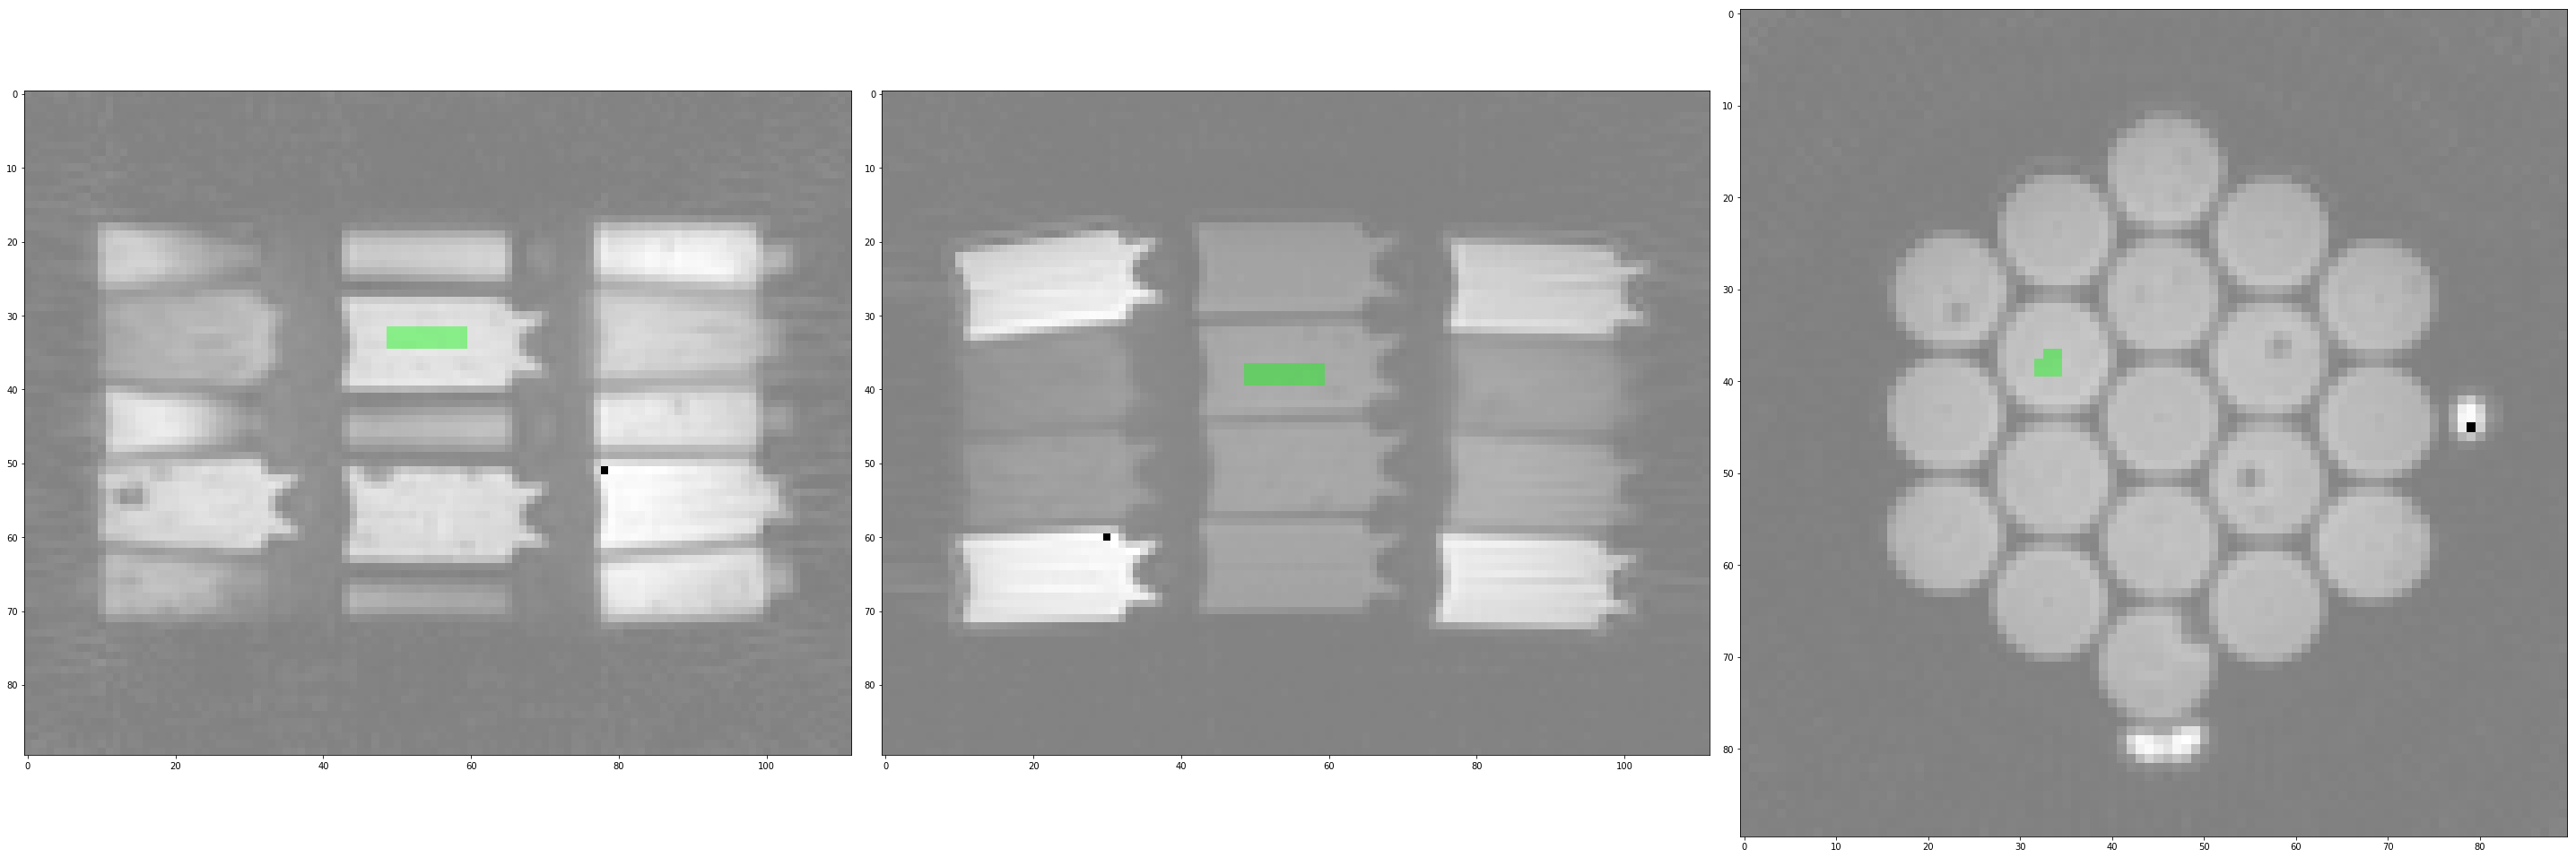

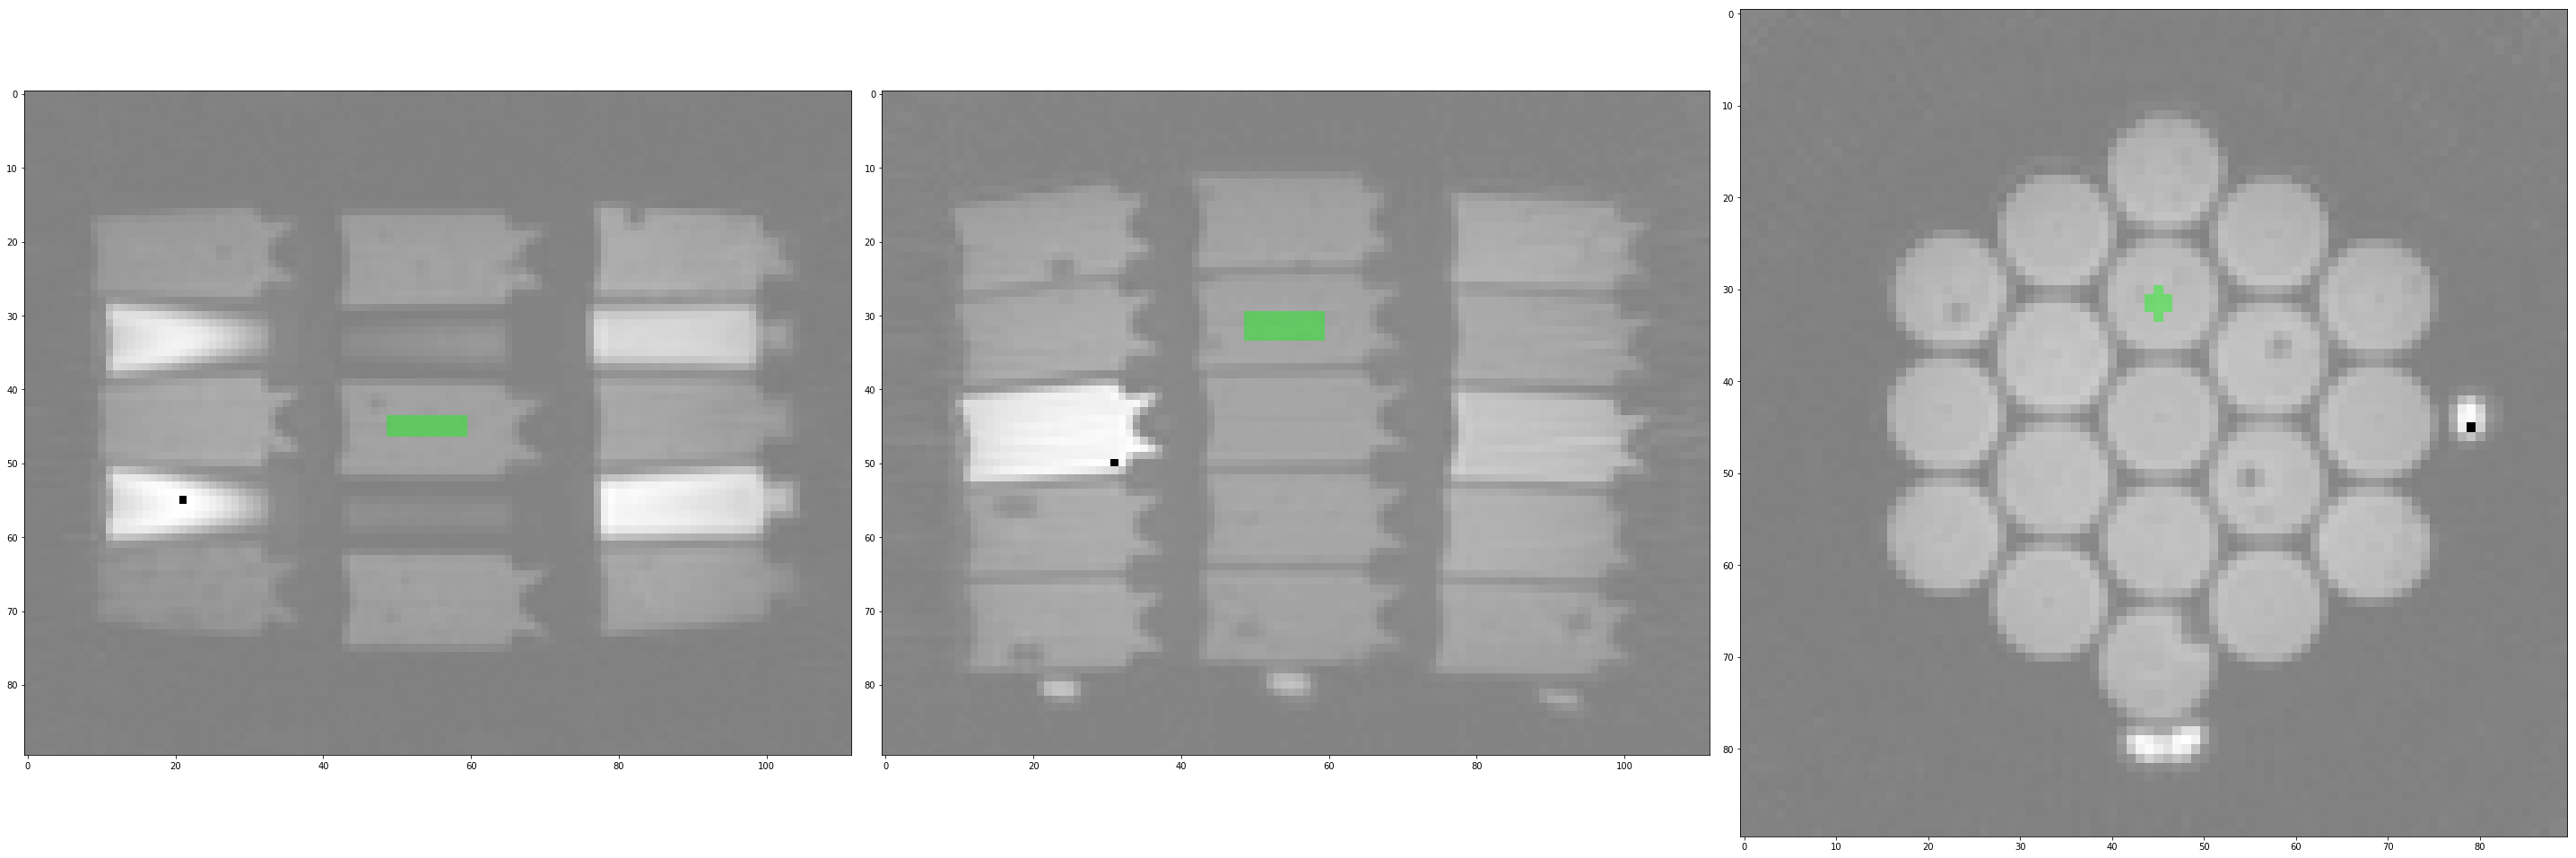

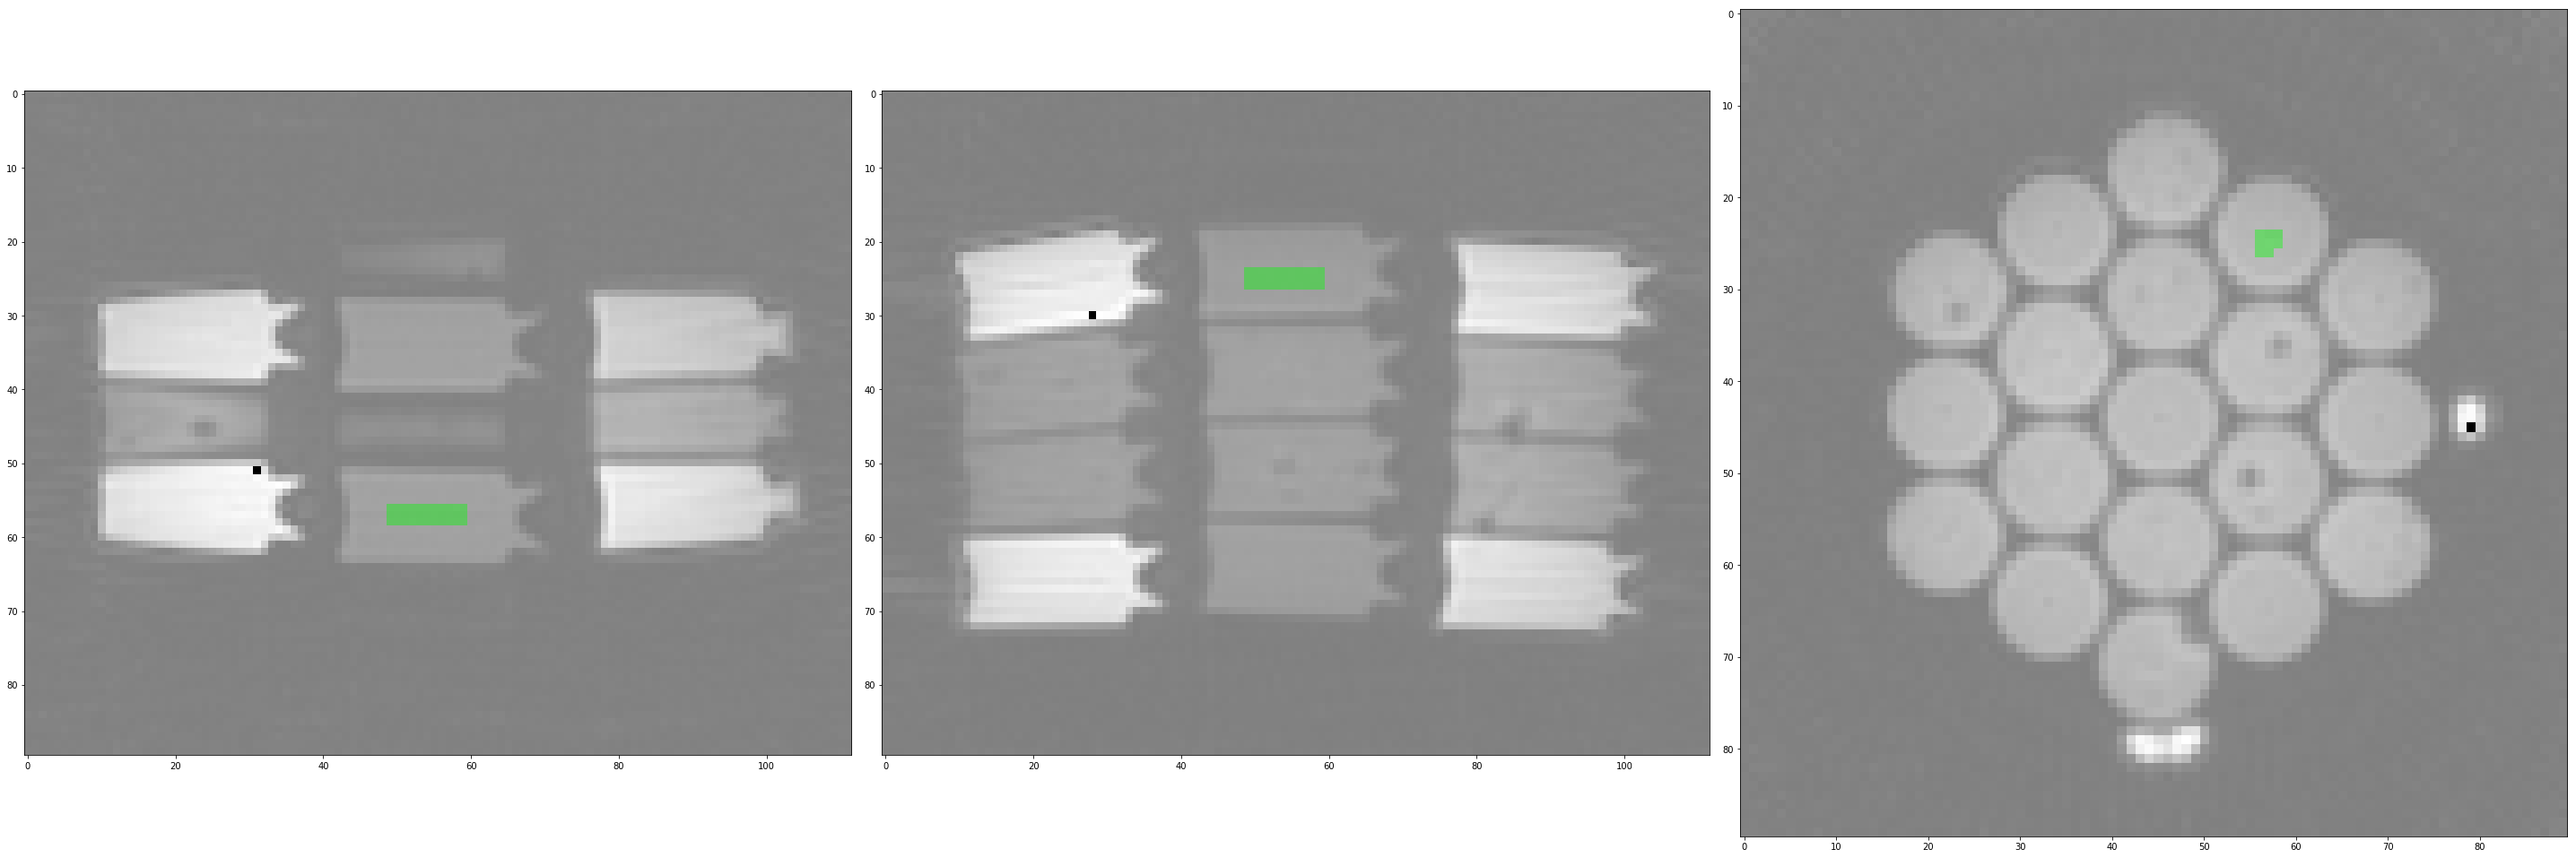

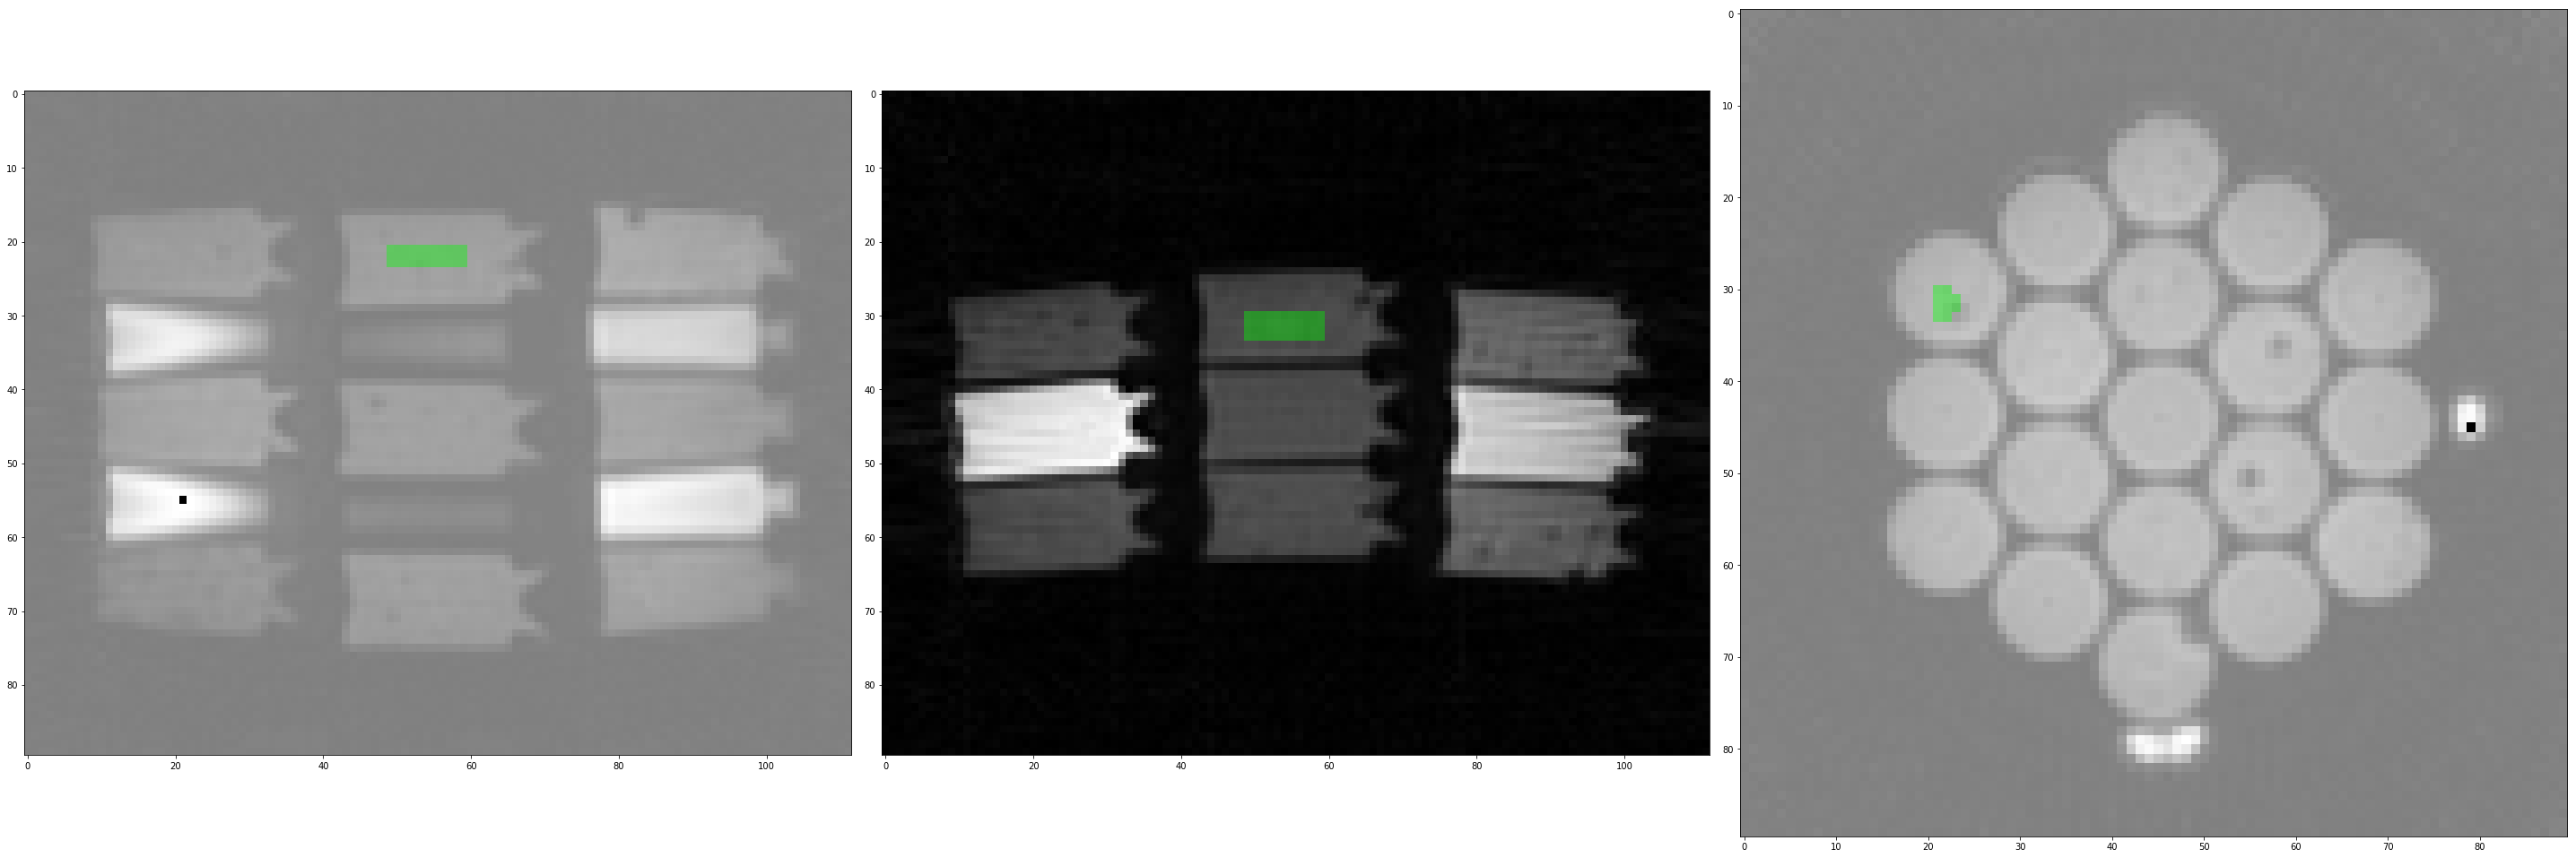

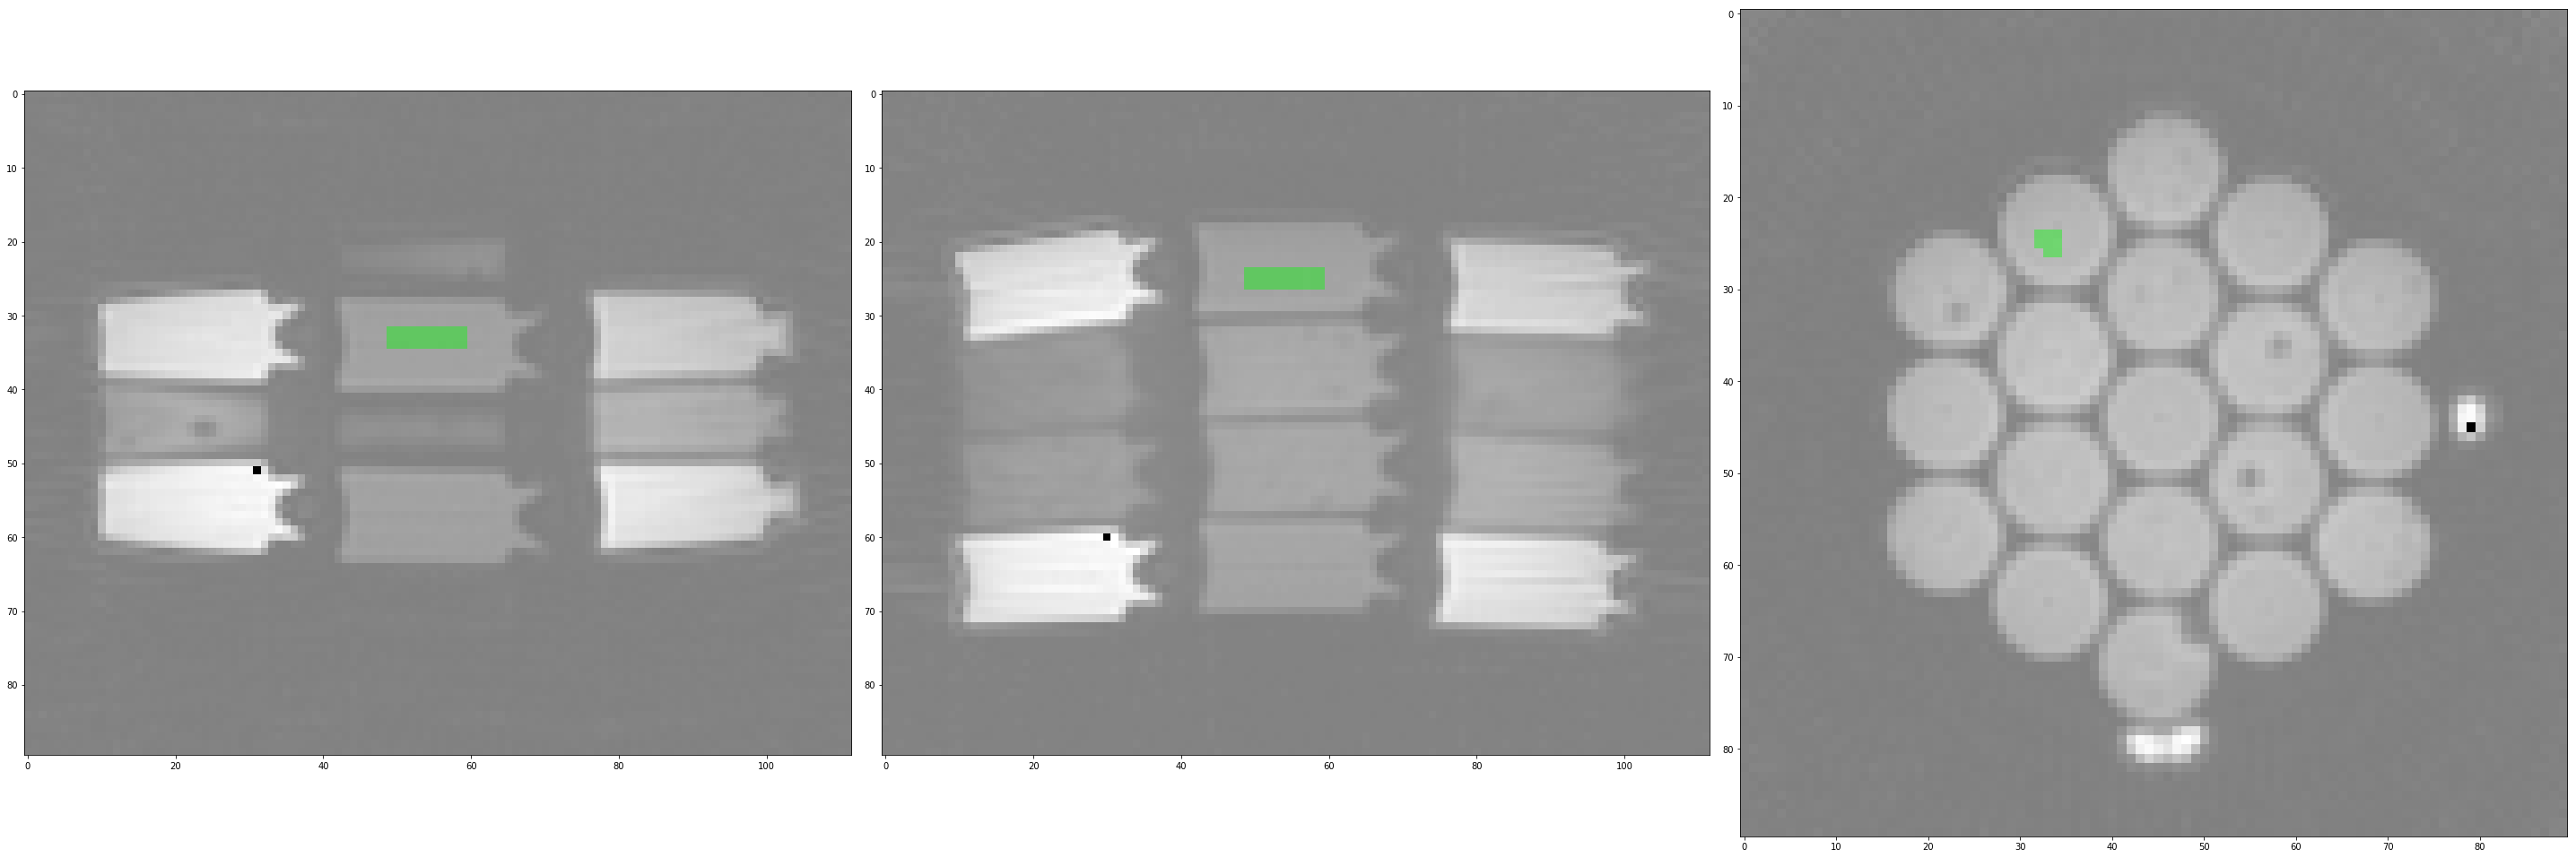

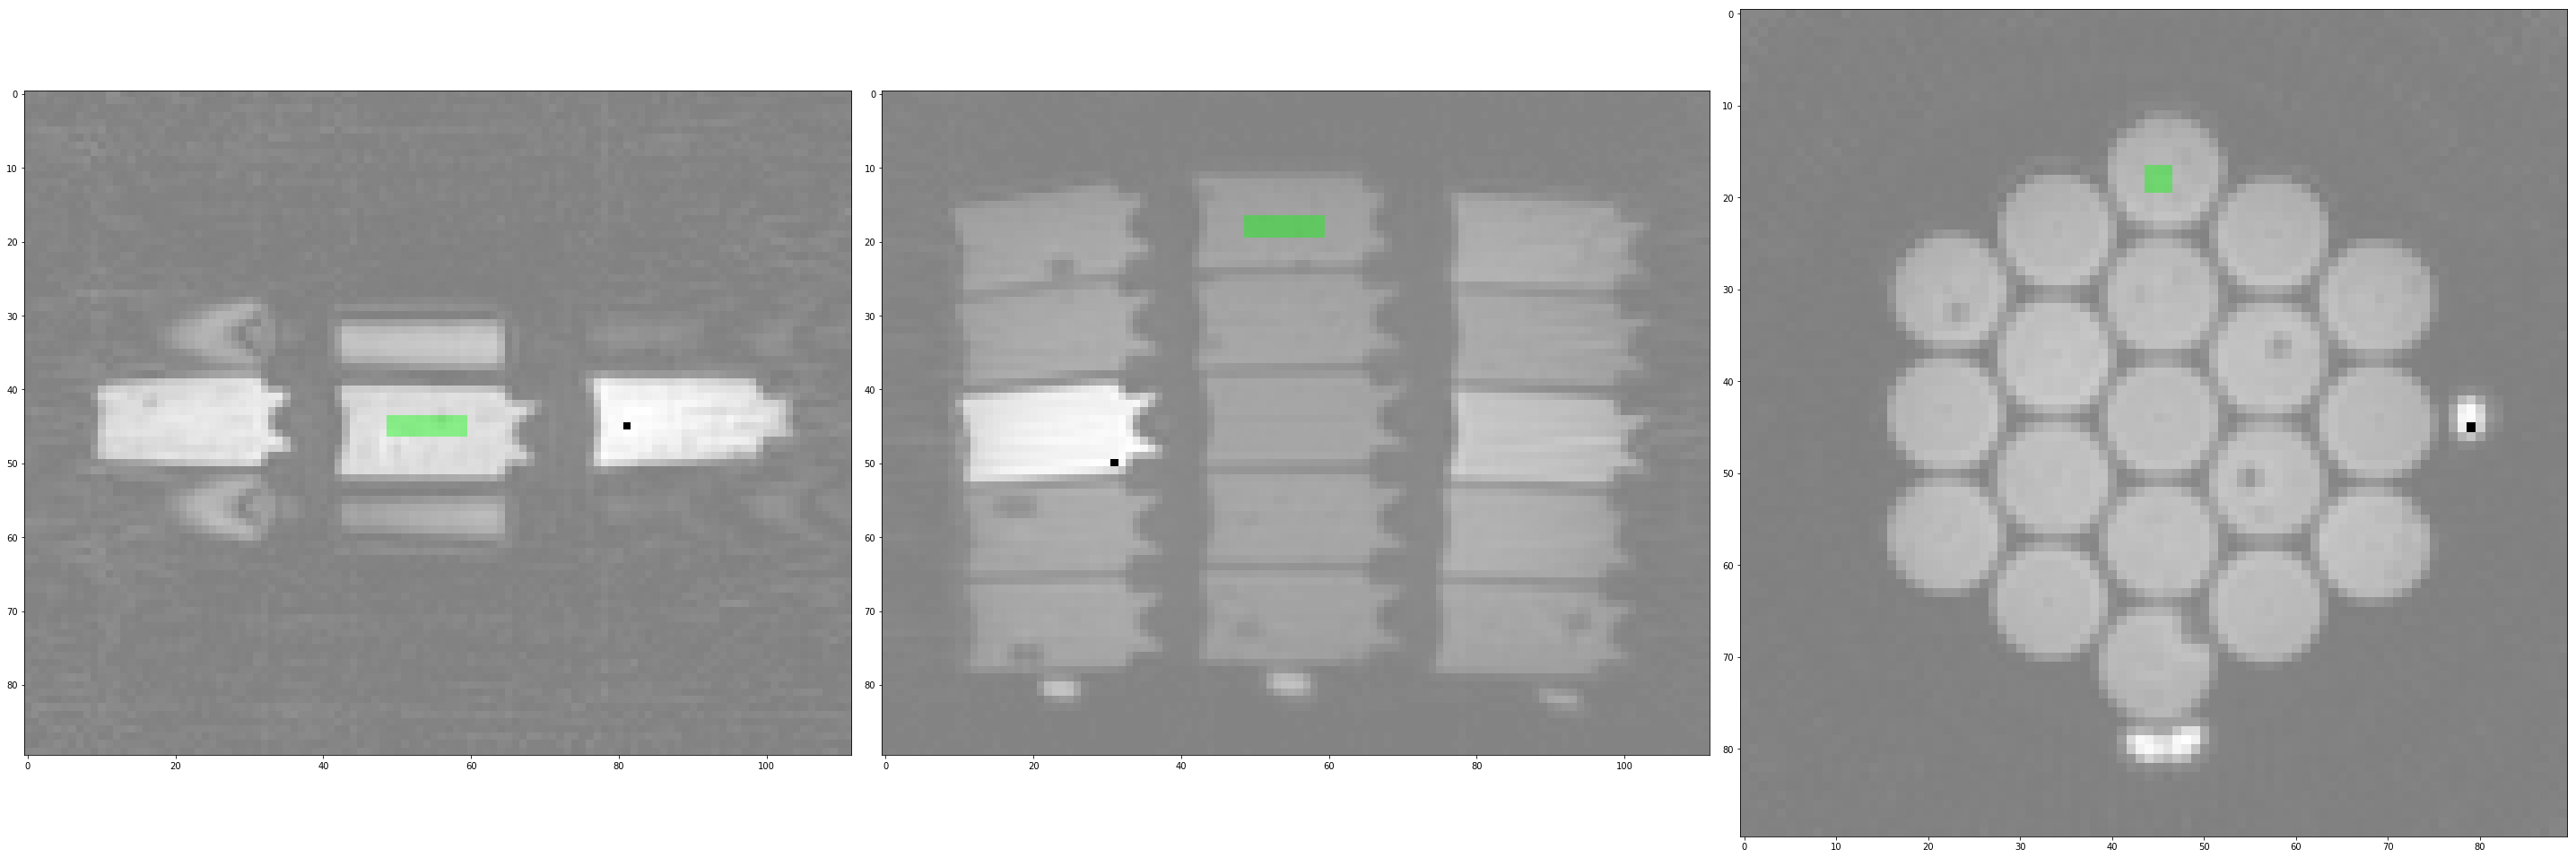

In [7]:
plt.close()
rpIoh.compute_rois(nx, ny, nz, dx, dy, dz,
                  cz0=(pIoh_sli * dz),
                  cx0=(int(nx/2) * dx) - 0.0, 
                  cy0=(int(ny/2) * dy) + 0.0, 
                  th0=(0.0 * np.pi / 180.0))
fgs = rpIoh.preview_geometry_3d(recon_ims_all_echoes[0,0,::], nx, ny, nz, dx, dy, dz)
plt.show()

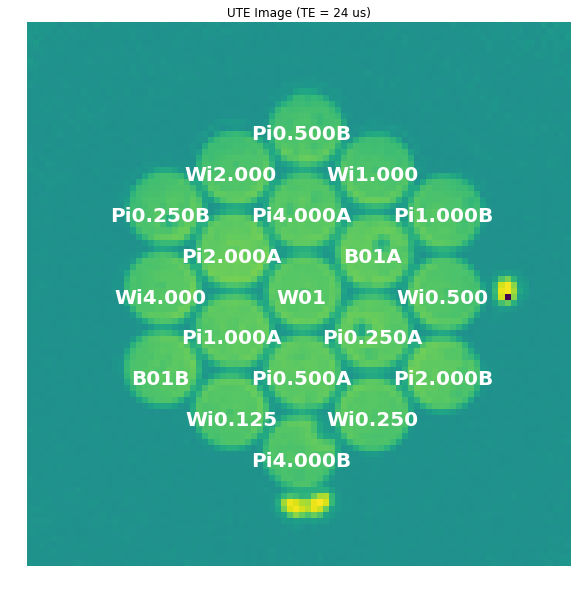

In [8]:
# rpIoh labeled slice (TE[0])

plt.close()
fig = plt.figure(figsize=(10.0, 10.0))

scl_slice = pIoh_scl_slice
plt.imshow(scl_slice)

fig.patch.set_facecolor([0,0,0,0])
plt.gca().axis('off')

for ci,roi in enumerate(rpIoh.roi_info):
    cx = roi['cx']/dx
    cy = roi['cy']/dy
    label = roi['label'].split('(')[1].split(')')[0]
    plt.text(cy, cx, label, fontdict = {
        'color': 'white',
        'fontsize': 20,
        'fontweight' : 'bold',
        'horizontalalignment' : 'center',
        'verticalalignment' : 'center'
    })

fig.patch.set_facecolor('white')
plt.title('UTE Image (TE = {:d} us)'.format(int(ute_list[0])))
plt.show()

fig.savefig('UTE{:d}-rpIoh_labeled_slice.svg'.format(int(ute_list[0])))
fig.savefig('UTE{:d}-rpIoh_labeled_slice.png'.format(int(ute_list[0])))

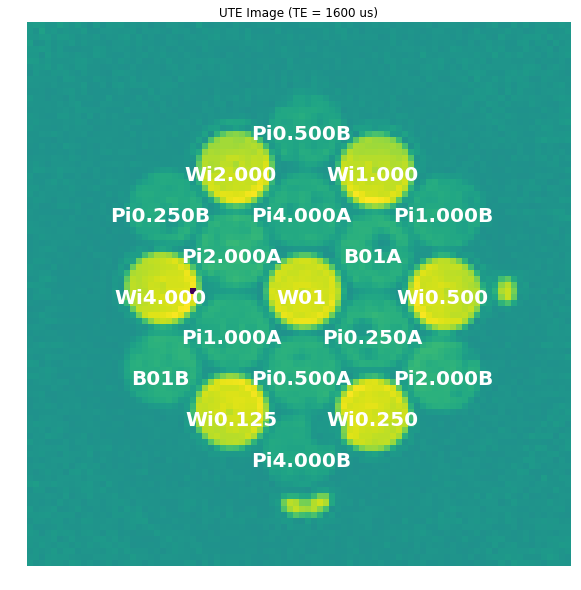

In [9]:
# rpIoh labeled slice (TE[-1])

plt.close()
fig = plt.figure(figsize=(10.0, 10.0))

ute_idx = 15

rr, cc, scl_slice = view_utils.norm_mag_slice(recon_ims_all_echoes[ute_idx,0,::], 
                                              pIoh_sli, 2)
plt.imshow(scl_slice)

fig.patch.set_facecolor([0,0,0,0])
plt.gca().axis('off')

for ci,roi in enumerate(rpIoh.roi_info):
    cx = roi['cx']/dx
    cy = roi['cy']/dy
    label = roi['label'].split('(')[1].split(')')[0]
    plt.text(cy, cx, label, fontdict = {
        'color': 'white',
        'fontsize': 20,
        'fontweight' : 'bold',
        'horizontalalignment' : 'center',
        'verticalalignment' : 'center'
    })

fig.patch.set_facecolor('white')
plt.title('UTE Image (TE = {:d} us)'.format(int(ute_list[ute_idx])))
plt.show()

fig.savefig('UTE{:d}-rpIoh_labeled_slice.svg'.format(int(ute_list[ute_idx])))
fig.savefig('UTE{:d}-rpIoh_labeled_slice.png'.format(int(ute_list[ute_idx])))

In [10]:
# Collect data from each ROI
# Note: assumes ROIs are uniform & uses all voxels as separate datapoints for fit

for roi in (rpIoh.roi_info):
    roi['echo_times'] = []
    roi['signal_magnitudes'] = []
    
    for zi in range(nz):
        for yi in range(ny):
            for xi in range(nx):
                if (roi['mask'][xi, yi, zi]):
                    roi['echo_times'].extend(ute_list)
                    roi['signal_magnitudes'].extend(
                        np.float(np.abs(np.complex(*recon_ims_all_echoes[ei,0,zi,yi,xi]))) for ei in range(num_utes)
                    )
    
    roi['echo_times'] = np.array(roi['echo_times'], dtype=np.float)
    roi['signal_magnitudes'] = np.array(roi['signal_magnitudes'], dtype=np.float)
    
    #print('ROI: {:s}\n\t{:d} datapoints...'.format(roi['label'], roi['echo_times'].size))

In [12]:
from pyqmri.signal_models.gre_3dute import t2strw_mag_resid as mag_sig_residuals
from scipy.optimize import least_squares

for roi in (rpIoh.roi_info):
    # Compute initial parameter estimates
    #T2_est = (roi['echo_times'][5] - roi['echo_times'][0]) / np.log(roi['signal_magnitudes'][5]/roi['signal_magnitudes'][0])
    T2_est = 100.0
    K_est = np.max(roi['signal_magnitudes']) * 1.2
    N_est = np.mean(roi['signal_magnitudes'][np.where(roi['echo_times'] == np.max(roi['echo_times']))])
    
    print('\n*** Computing fit for ROI: {:s} ***'.format(roi['label']))
    #print('\tT2* init. estimate = {:f}'.format(T2_est))
    #print('\tK init. estimate   = {:f}'.format(K_est))
    #print('\tN init. estimate   = {:f}\n'.format(N_est))
    
    params_est = np.array((T2_est, K_est, N_est))
    result = least_squares(mag_sig_residuals,
                           params_est,
                           args=(roi['echo_times'],
                                 roi['signal_magnitudes']),
                           method='lm', verbose=2)
    
    print('\tT2* = {:f}'.format(result.x[0]))
    print('\tK   = {:f}'.format(result.x[1]))
    print('\tN   = {:f}\n'.format(result.x[2]))
    
    roi['fit_result'] = result
    


*** Computing fit for ROI: C00: (Pi4.000B) Plaster + 4.0% wt. Iohexol ***
`ftol` termination condition is satisfied.
Function evaluations 30, initial cost 1.4593e-04, final cost 1.9313e-05, first-order optimality 1.90e-09.
	T2* = 907.524118
	K   = 0.000953
	N   = 0.000012


*** Computing fit for ROI: C01: (Wi0.250) Water + 0.25% wt. Iohexol ***
`ftol` termination condition is satisfied.
Function evaluations 41, initial cost 1.1356e-04, final cost 9.4919e-07, first-order optimality 4.78e-10.
	T2* = 1150.829387
	K   = 0.000054
	N   = 0.000975


*** Computing fit for ROI: C02: (Pi2.000B) Plaster + 2.0% wt. Iohexol ***
`ftol` termination condition is satisfied.
Function evaluations 37, initial cost 2.8084e-04, final cost 1.7677e-06, first-order optimality 8.64e-09.
	T2* = 1291.934496
	K   = 0.001155
	N   = -0.000004


*** Computing fit for ROI: C03: (Wi0.125) Water + 0.125% wt. Iohexol ***
`ftol` termination condition is satisfied.
Function evaluations 41, initial cost 1.1093e-04, final c

In [13]:
dd = os.path.basename(os.path.dirname(os.getcwd()))
dd = os.path.basename(os.getcwd()) + '.' + dd
print(dd)


T2str.20180926.MP-Mk5.Exp5


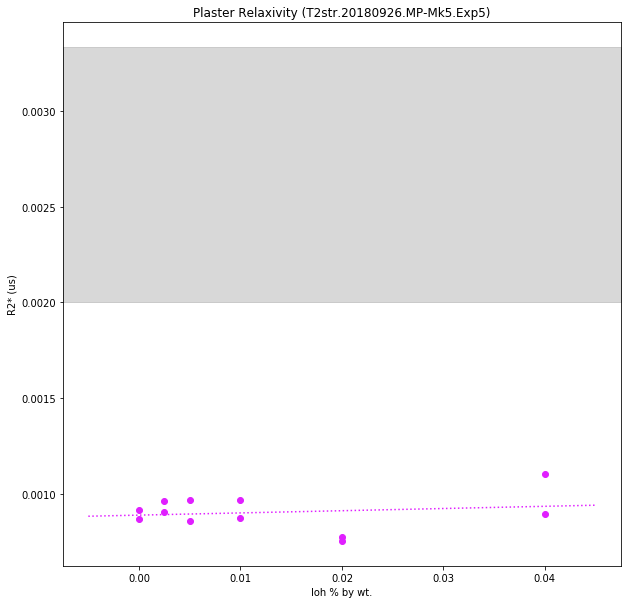

In [16]:
# Plaster relaxivity vs. Ioh concentration
plaster_idx = np.array([0, 2, 11, 18, 16, 7, 14, 13, 8, 4, 5, 10],
                       dtype=np.uint8)
Ioh_plaster_t2s = np.array(
    list(rpIoh.roi_info[ci]['fit_result'].x[0] for ci in plaster_idx)
)
Ioh_plaster_conc = np.array(
    [0.04, 0.02, 0.01, 0.005, 0.0025, 0.0] * 2
)

fit = np.polyfit(Ioh_plaster_conc, 1.0/Ioh_plaster_t2s, 1)
fit_fn = np.poly1d(fit)

cc = np.linspace(-0.005, 0.045, 10)
plt.close()

import matplotlib.cm as cm
cl = cm.get_cmap('cool')
colr = cl(3.5/4)

fig = plt.figure(figsize=(10.0,10.0))
plt.plot(Ioh_plaster_conc, 1.0/Ioh_plaster_t2s, 'o', color=colr)
plt.plot(cc, fit_fn(cc), ':', color=colr)

ax = plt.gca()
bnds = ax.get_xlim()

xsh = np.linspace(bnds[0], bnds[1], 10)
ylb = 1/300 * np.ones(xsh.shape)
yub = 1/500 * np.ones(xsh.shape)
ax.fill_between(xsh, ylb, yub, color='grey', alpha='0.3')

ax.set_xlim(bnds)

plt.title('Plaster Relaxivity ({:s})'.format(dd))
plt.xlabel('Ioh % by wt.')
plt.ylabel('R2* (us)')

fig.set_facecolor('white')
fig.savefig('{:s}.Ioh-PlasterRlx.png'.format(dd))

plt.show()